In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

### Data Cleaning:

In [2]:
#Load datasets
fao = pd.read_csv('Datasets/FAO.csv', encoding='latin1')
faostat = pd.read_csv('Datasets/FAOSTAT.csv', encoding='latin1')

In [3]:
## Create data dictionary for FAO DataFrame
fao_data_dictionary = pd.DataFrame({
    'Column Name': fao.columns,
    'Data Type': fao.dtypes,
    'Description': [
        'Abbreviation of the area (country or region)',
        'Numeric code representing the area',
        'Name of the area (country or region)',
        'Numeric code representing the item (e.g., crop, livestock)',
        'Name of the item (e.g., crop, livestock)',
        'Numeric code representing the element (e.g., production, yield)',
        'Name of the element (e.g., production, yield)',
        'Unit of measurement (e.g., tonnes, hectares)',
        'Latitude of the area, if applicable',
        'Longitude of the area, if applicable',
        'Values for each year from 1961 to 2013, representing the data for the respective year'
    ] + [''] * (len(fao.columns) - 11)  # Fill remaining descriptions if needed
})

# Create data dictionary for FAOSTAT DataFrame
faostat_data_dictionary = pd.DataFrame({
    'Column Name': faostat.columns,
    'Data Type': faostat.dtypes,
    'Description': [
        'Code representing the domain of the data (e.g., crops, livestock)',
        'Name of the domain (e.g., crops, livestock)',
        'Numeric code representing the area (country or region)',
        'Name of the area (country or region)',
        'Numeric code representing the element (e.g., production, yield)',
        'Name of the element (e.g., production, yield)',
        'Numeric code representing the item (e.g., crop, livestock)',
        'Name of the item (e.g., crop, livestock)',
        'Numeric code representing the year of the data entry',
        'Year of the data entry',
        'Unit of measurement (e.g., tonnes, hectares)',
        'Value of the data point',
        'Code indicating special notes or exceptions about the data point',
        'Description of the flag',
        'Additional notes or comments regarding the data point'
    ] + [''] * (len(faostat.columns) - 15)  # Fill remaining descriptions if needed
})

In [4]:
# Handling Missing Values
# Checking for missing values
fao_missing = fao.isnull().sum()
fao_stat_missing = faostat.isnull().sum()

print(fao_missing)
print(fao_stat_missing)

# Replace NaN values with 0 in the fao DataFrame
fao = fao.fillna(0)

# Replace NaN values with 0 in the faostat DataFrame
faostat = faostat.fillna(0)

print(fao_missing)
print(fao_stat_missing)

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64
Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64
Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64
Domain Code         0
Domain              0
Area Code    

In [5]:
# Removing Duplicates
fao.drop_duplicates(inplace=True)
faostat.drop_duplicates(inplace=True)

In [6]:
# Standardizing Column Names
fao.columns = fao.columns.str.lower().str.replace(' ', '_')
faostat.columns = faostat.columns.str.lower().str.replace(' ', '_')

### Data Merging

#### Variable Removal and Retention Justifications
###### - area_abbreviation: This column is likely a shorthand version of Area. Since Area is more descriptive and already retained, area_abbreviation is redundant.
###### - element_code: Actual Element names such as "Food/Feed" are more useful to the analysis, element_code is dropped because of redundancy.
###### - latitude and longitude: These columns provide geographic coordinates. While useful in spatial analysis, they may not be necessary for the analysis.

###### - area: merging the two dataset will have a redundant area column, hence one was dropped (fao_stat)

In [7]:
#Drop columns from fao
fao_drop = fao.drop(columns=['area_abbreviation', 'element_code', 'latitude', 'longitude'], errors='ignore')
#Drop these columns from fao_stat: Domain Code, Element Code, Element,Item, Code,Item,Year Code, Flag, Flag Description,Note
fao_stat_drop= faostat.drop(columns=[
    'area',
    'domain_code',
    'element_code',
    'element',
    'item_code',
    'item',
    'year_code',
    'flag',
    'flag_description',
    'note',
    'domain'
], errors='ignore')

# Merging the datasets on 'Area Code'
merged_df = pd.merge(fao_drop, fao_stat_drop, on='area_code', how='inner')
merged_df.rename(columns={
    'item_code': 'item_id',
    'unit_x': 'unit',
    'value': 'population_in_2017'
}, inplace=True)

merged_df.head(10)

,area_code,area,item_id,item,element,unit,y1961,y1962,y1963,y1964,...,y2007,y2008,y2009,y2010,y2011,y2012,y2013,year,unit_y,population_in_2017
0,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,...,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,2017,1000 persons,35530.081
1,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,...,455.0,490.0,415.0,442.0,476.0,425,422,2017,1000 persons,35530.081
2,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,...,263.0,230.0,379.0,315.0,203.0,367,360,2017,1000 persons,35530.081
3,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,...,48.0,62.0,55.0,60.0,72.0,78,89,2017,1000 persons,35530.081
4,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,...,249.0,247.0,195.0,178.0,191.0,200,200,2017,1000 persons,35530.081
5,2,Afghanistan,2514,Maize and products,Food,1000 tonnes,403.0,403.0,410.0,415.0,...,67.0,69.0,71.0,82.0,73.0,77,76,2017,1000 persons,35530.081
6,2,Afghanistan,2517,Millet and products,Food,1000 tonnes,17.0,18.0,19.0,20.0,...,19.0,21.0,18.0,14.0,14.0,14,12,2017,1000 persons,35530.081
7,2,Afghanistan,2520,"Cereals, Other",Food,1000 tonnes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,2017,1000 persons,35530.081
8,2,Afghanistan,2531,Potatoes and products,Food,1000 tonnes,111.0,97.0,103.0,110.0,...,260.0,242.0,250.0,192.0,169.0,196,230,2017,1000 persons,35530.081
9,2,Afghanistan,2536,Sugar cane,Feed,1000 tonnes,45.0,45.0,45.0,45.0,...,65.0,54.0,114.0,83.0,83.0,69,81,2017,1000 persons,35530.081


In [8]:
# Map the Countries to their Region - Plotting data for hundreds of countries individually can result in cluttered and overwhelming visualizations.
# Regions consolidate countries, making the visualizations more comprehensible.

# Create a dictionary mapping countries to their respective regions
# Dictionary mapping countries to their respective continents
region_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'British Virgin Islands': 'North America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Channel Islands': 'Europe',
    'Chile': 'South America',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Côte d\'Ivoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Democratic People\'s Republic of Korea': 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Falkland Islands (Malvinas)': 'South America',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Guiana': 'South America',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guadeloupe': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Holy See': 'Europe',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Isle of Man': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Oceania',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Palestine': 'Asia',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Helena, Ascension and Tristan da Cunha': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Pierre and Miquelon': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Eswatini': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'North Macedonia': 'Europe',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'United States Virgin Islands': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Wallis and Futuna Islands': 'Oceania',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    'China': 'Asia'
}

# Assign the regions to the DataFrame
merged_df['region'] = merged_df['area'].map(region_mapping)

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_code           21477 non-null  int64  
 1   area                21477 non-null  object 
 2   item_id             21477 non-null  int64  
 3   item                21477 non-null  object 
 4   element             21477 non-null  object 
 5   unit                21477 non-null  object 
 6   y1961               21477 non-null  float64
 7   y1962               21477 non-null  float64
 8   y1963               21477 non-null  float64
 9   y1964               21477 non-null  float64
 10  y1965               21477 non-null  float64
 11  y1966               21477 non-null  float64
 12  y1967               21477 non-null  float64
 13  y1968               21477 non-null  float64
 14  y1969               21477 non-null  float64
 15  y1970               21477 non-null  float64
 16  y197

### 1.3 Feature Engineering

In [10]:
# Add a new column 'Row_Mean' that calculates the mean across Y1961 to Y2013 for each row
year_columns = [col for col in fao.columns if col.startswith(('y1', 'y2'))]
merged_df['average_availability'] = merged_df[year_columns].mean(axis=1)

In [11]:
# Add a new column 'Row_Mean' that calculates the mean across Y1961 to Y2013 for each row
merged_df['sum_availability'] = merged_df[year_columns].sum(axis=1)

In [12]:
# 2. Calculate Food or Feed Availability Relative to 2017 Population (Scaled to 2017 Population)
merged_df['availability_per_capita'] = merged_df['average_availability'] / merged_df['population_in_2017']

#We can add total food balance through the years, calories,

In [13]:
# Calcualte the Growth Rate

# Sort the year columns to ensure they are in chronological order
##year_columns = sorted([col for col in merged_df.columns if col.startswith('y')])

# Calculate the year-over-year growth rate
##for i in range(1, len(year_columns)):
##    prev_year = year_columns[i - 1]
##    curr_year = year_columns[i]

    # Growth rate for the current year compared to the previous year
##    merged_df[f'Growth_{curr_year}'] = ((merged_df[curr_year] - merged_df[prev_year]) / merged_df[prev_year] * 100).round(2)

In [14]:
# Calcualte the Growth Rate
growth_df = merged_df[['area', 'item']].copy()

if 'year' in growth_df.columns:
    growth_df = growth_df.drop(columns=['year'])

# Sort the year columns to ensure they are in chronological order
##year_columns = sorted([col for col in merged_df.columns if col.startswith('y')])

# Calculate the year-over-year growth rate
##for i in range(1, len(year_columns)):
##    prev_year = year_columns[i - 1]
##    curr_year = year_columns[i]

    # Growth rate for the current year compared to the previous year
##    merged_df[f'Growth_{curr_year}'] = ((merged_df[curr_year] - merged_df[prev_year]) / merged_df[prev_year] * 100).round(2)

In [15]:
# Calculate the overall growth rate from 1961 to 2013 and round to 2 decimal places
merged_df['Overall_Growth_1961_to_2013'] = ((merged_df['y2013'] / merged_df['y1961']) - 1) * 100
merged_df['Overall_Growth_1961_to_2013'] = merged_df['Overall_Growth_1961_to_2013'].round(2)

# Task 2: Data Exploration

### 2.1 Descriptive Statistics:

In [16]:
merged_df.head(10)

,area_code,area,item_id,item,element,unit,y1961,y1962,y1963,y1964,...,y2012,y2013,year,unit_y,population_in_2017,region,average_availability,sum_availability,availability_per_capita,Overall_Growth_1961_to_2013
0,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,...,4810,4895,2017,1000 persons,35530.081,Asia,2508.037736,132926.0,0.070589,153.89
1,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,...,425,422,2017,1000 persons,35530.081,Asia,288.339623,15282.0,0.008115,130.60
2,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,...,367,360,2017,1000 persons,35530.081,Asia,97.924528,5190.0,0.002756,373.68
3,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,...,78,89,2017,1000 persons,35530.081,Asia,160.924528,8529.0,0.004529,-62.45
4,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,...,200,200,2017,1000 persons,35530.081,Asia,178.320755,9451.0,0.005019,-4.76
5,2,Afghanistan,2514,Maize and products,Food,1000 tonnes,403.0,403.0,410.0,415.0,...,77,76,2017,1000 persons,35530.081,Asia,287.094340,15216.0,0.008080,-81.14
6,2,Afghanistan,2517,Millet and products,Food,1000 tonnes,17.0,18.0,19.0,20.0,...,14,12,2017,1000 persons,35530.081,Asia,22.264151,1180.0,0.000627,-29.41
7,2,Afghanistan,2520,"Cereals, Other",Food,1000 tonnes,0.0,0.0,0.0,0.0,...,0,0,2017,1000 persons,35530.081,Asia,0.094340,5.0,0.000003,NaN
8,2,Afghanistan,2531,Potatoes and products,Food,1000 tonnes,111.0,97.0,103.0,110.0,...,196,230,2017,1000 persons,35530.081,Asia,200.471698,10625.0,0.005642,107.21
9,2,Afghanistan,2536,Sugar cane,Feed,1000 tonnes,45.0,45.0,45.0,45.0,...,69,81,2017,1000 persons,35530.081,Asia,38.358491,2033.0,0.001080,80.00


In [17]:
# Summary statistics
print(merged_df.describe())

          area_code       item_id          y1961          y1962  \
count  21477.000000  21477.000000   21477.000000   21477.000000   
mean     125.449411   2694.211529     163.086604     167.697164   
std       72.868149    148.973406    1705.160828    1723.638749   
min        1.000000   2511.000000       0.000000       0.000000   
25%       63.000000   2561.000000       0.000000       0.000000   
50%      120.000000   2640.000000       0.000000       0.000000   
75%      188.000000   2782.000000      11.000000      12.000000   
max      276.000000   2961.000000  112227.000000  109130.000000   

               y1963          y1964          y1965          y1966  \
count   21477.000000   21477.000000   21477.000000   21477.000000   
mean      171.607953     175.333846     181.707548     188.750291   
std      1702.632886    1703.461304    1843.214462    1921.226819   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000 

c:\Users\nigel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\nigel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


### 2.2 Group-Based Analysis:



In [18]:
# 1. Group by 'Area' (Country) and 'Element' (Food or Feed) to calculate the mean availability over time
grouped_df = merged_df.groupby(['area', 'element'])[year_columns].mean().reset_index()

# Display the first few rows of the grouped data
print(grouped_df.head())


          area element       y1961       y1962       y1963       y1964  \
0  Afghanistan    Feed   72.000000   72.000000   73.600000   74.000000   
1  Afghanistan    Food  120.013699  119.095890  115.863014  129.178082   
2      Albania    Feed    3.760000    4.320000    4.960000    4.880000   
3      Albania    Food   16.448980   16.744898   16.765306   18.030612   
4      Algeria    Feed    3.772727    4.272727    2.863636    4.454545   

        y1965       y1966       y1967       y1968  ...       y2004  \
0   72.000000   72.400000   78.800000   82.600000  ...   70.400000   
1  133.602740  129.383562  143.849315  146.328767  ...  216.958904   
2    3.800000    7.880000    8.080000    9.160000  ...   39.600000   
3   18.255102   18.346939   18.816327   19.795918  ...   57.622449   
4    3.818182    2.500000    3.363636    5.909091  ...  207.954545   

        y2005       y2006       y2007       y2008       y2009       y2010  \
0  118.400000  134.200000  139.200000  129.400000  161.60

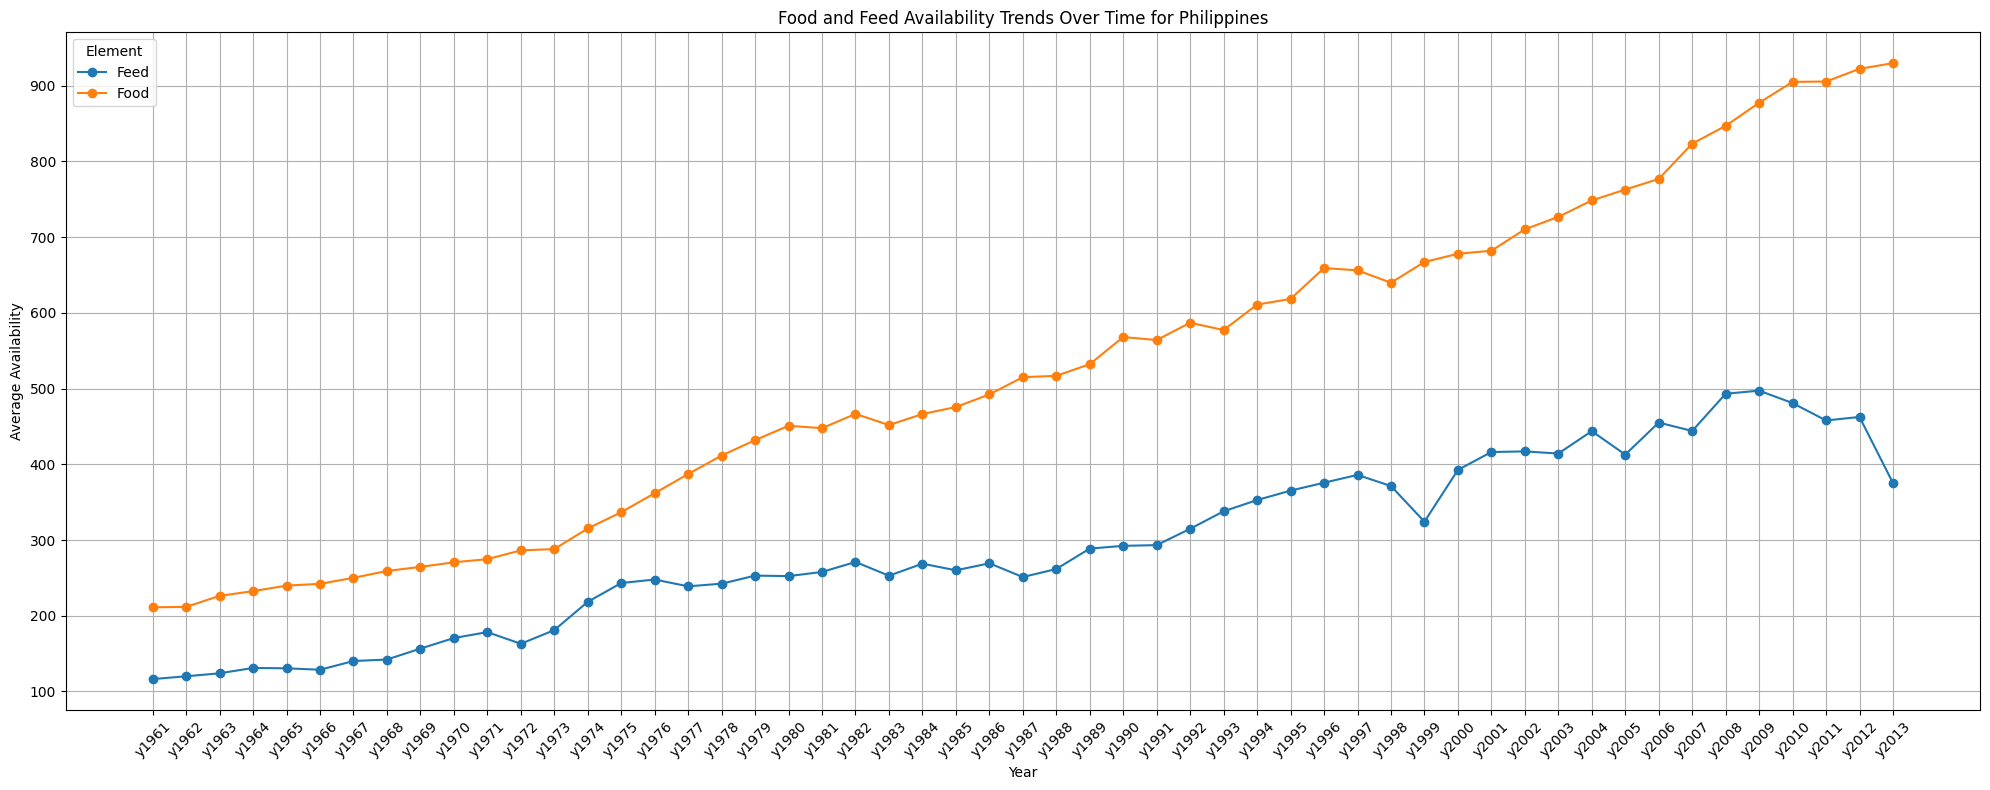

In [19]:
# Selected country
selected_country = 'Philippines'

# Filter data for the selected country
country_data = grouped_df[grouped_df['area'] == selected_country]

plt.figure(figsize=(20, 8))

# Plot each element's data over the years
for element in country_data['element'].unique():
        element_data = country_data[country_data['element'] == element]
        plt.plot(year_columns, element_data[year_columns].values.flatten(), marker='o', label=element)

# Customize plot
plt.title(f'Food and Feed Availability Trends Over Time for {selected_country}')
plt.xlabel('Year')
plt.ylabel('Average Availability')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Element')
plt.tight_layout()
plt.show()

### 2.3 Correlation Analysis

Cramér's V for Area vs. Item: 0.04
Cramér's V for Region vs. Item: 0.06


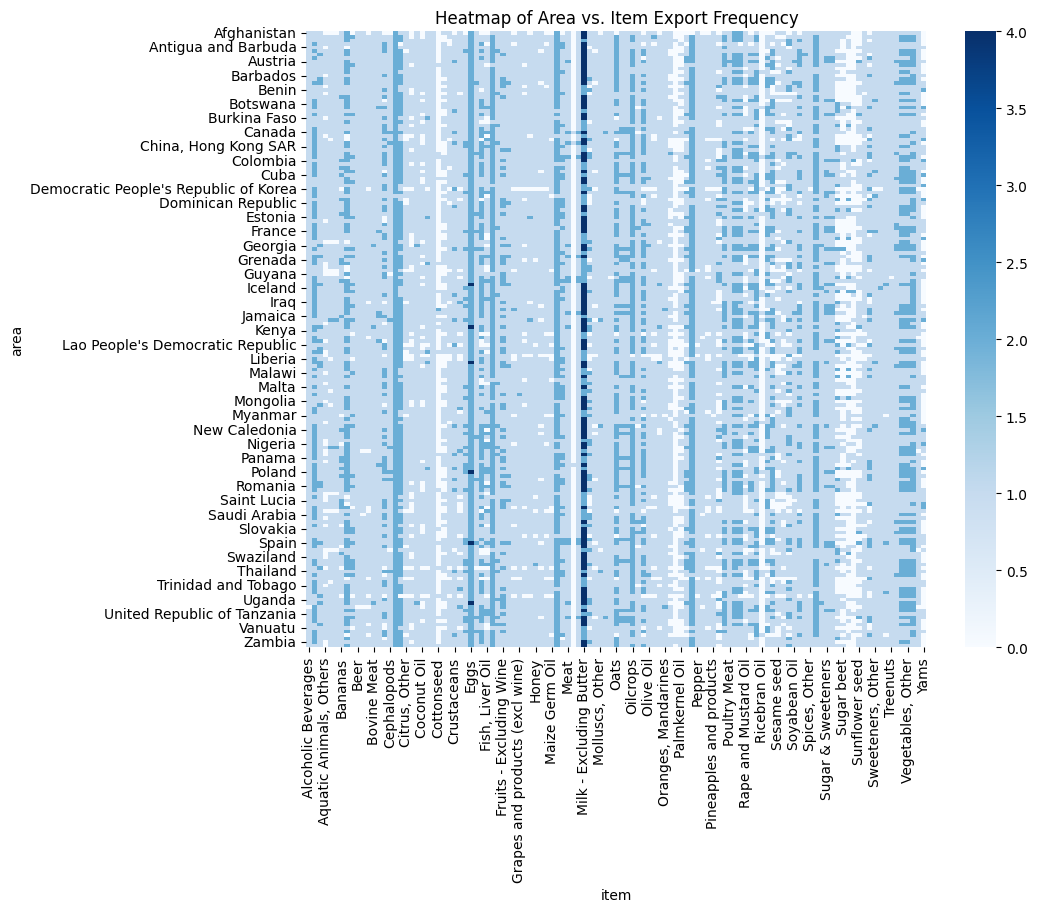

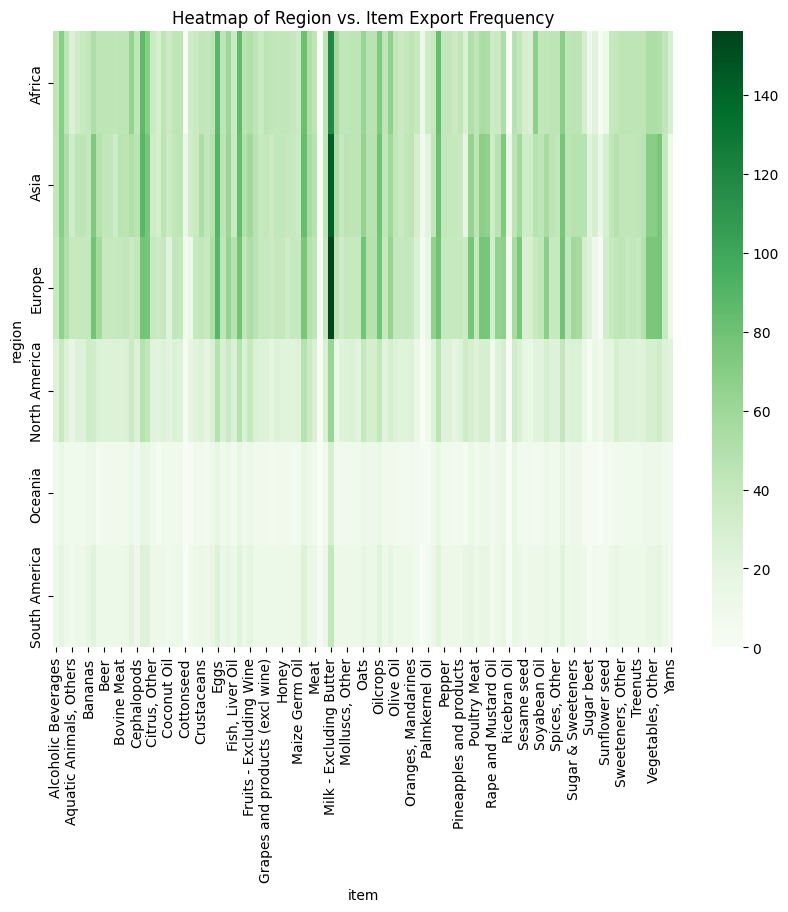

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Cross-tabulate area and item, region and item
area_item_crosstab = pd.crosstab(merged_df['area'], merged_df['item'])
region_item_crosstab = pd.crosstab(merged_df['region'], merged_df['item'])

# Calculate Cramér's V for area vs. item and region vs. item
cramers_v_area_item = cramers_v(area_item_crosstab.values)
cramers_v_region_item = cramers_v(region_item_crosstab.values)

# Display the results
print(f"Cramér's V for Area vs. Item: {cramers_v_area_item:.2f}")
print(f"Cramér's V for Region vs. Item: {cramers_v_region_item:.2f}")

# Optional: Visualize the cross-tabulations as heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(area_item_crosstab, cmap='Blues', annot=False)
plt.title('Heatmap of Area vs. Item Export Frequency')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(region_item_crosstab, cmap='Greens', annot=False)
plt.title('Heatmap of Region vs. Item Export Frequency')
plt.show()

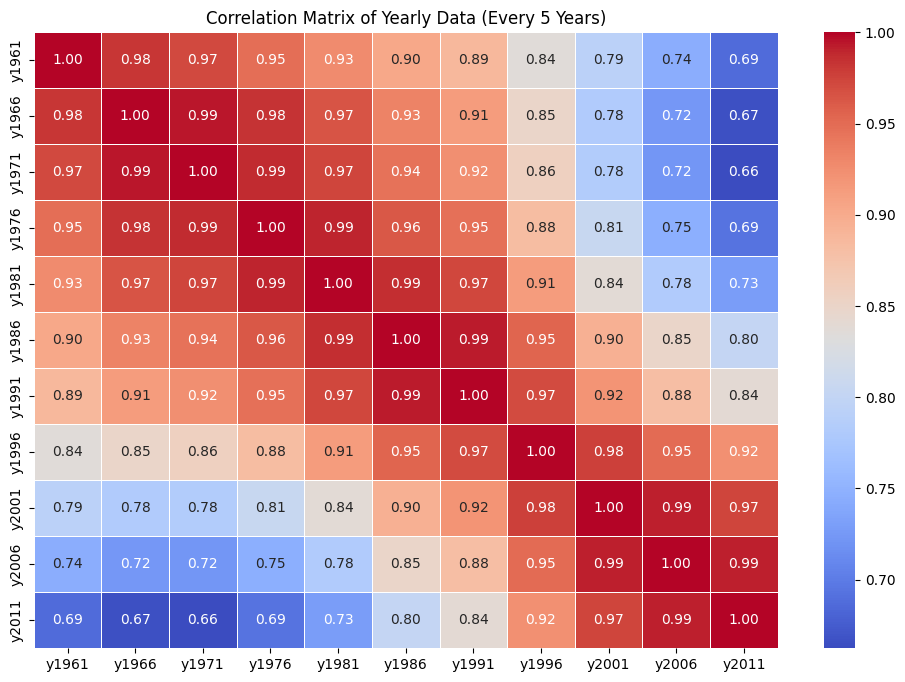

In [21]:
def extract_year(col):
    try:
        return int(col[1:])
    except ValueError:
        return None

# Filter year columns by every 5 years
selected_year_columns = [col for col in year_columns if extract_year(col) % 5 == 1]

# Select only the filtered year columns for correlation analysis
year_data = merged_df[selected_year_columns]

# Compute the correlation matrix
correlation_matrix = year_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Yearly Data (Every 5 Years)')
plt.show()

# Task 3: Data Visualization

### 3.1 Time Series Analysis

In [33]:
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])
countries = fao['area'].unique()
for country in countries:
    df_country = fao_top[fao_top['area'] == country]
    year_columns = [col for col in df_country.columns if col.startswith('y')]

    df_melted = df_country.melt(id_vars=['area', 'item'], value_vars=year_columns, var_name='Year', value_name='Value')

    df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

    df_average = df_melted.groupby('item')['Value'].mean().reset_index()

    df_average = df_average.rename(columns={'Value': 'AverageValue'})

    df_top10 = df_average.sort_values(by='AverageValue', ascending=False).head(10)

    print(df_top10)

#     plt.figure(figsize=(10, 6))
#     plt.bar(df_top10['item'], df_top10['AverageValue'], color='skyblue')
#     plt.title(f'Top 10 Items in {country} Based on Average Value')
#     plt.xlabel('Item')
#     plt.ylabel('Average Value')
#     plt.xticks(rotation=90)
#     plt.grid(True)

#     plt.show()

                        item  AverageValue
72        Wheat and products   2508.037736
9   Cereals - Excluding Beer   1771.528302
31   Milk - Excluding Butter    551.301887
70                Vegetables    542.528302
71         Vegetables, Other    542.226415
22   Fruits - Excluding Wine    498.264151
51  Rice (Milled Equivalent)    288.339623
23             Fruits, Other    255.169811
29                      Meat    250.886792
28        Maize and products    232.707547
                        item  AverageValue
16  Cereals - Excluding Beer    369.764151
46   Milk - Excluding Butter    286.047170
99        Wheat and products    220.933962
97                Vegetables    194.207547
32   Fruits - Excluding Wine    175.358491
98         Vegetables, Other    143.264151
42        Maize and products    117.443396
94     Tomatoes and products     76.339623
44                      Meat     74.452830
33             Fruits, Other     64.056604
                         item  AverageValue
16   Cerea

                         item  AverageValue
16   Cereals - Excluding Beer   5624.726415
34    Fruits - Excluding Wine   3189.584906
35              Fruits, Other   3176.396226
78   Rice (Milled Equivalent)   3155.216981
104                Vegetables   1928.094340
105         Vegetables, Other   1818.000000
44         Maize and products   1738.500000
90         Sugar & Sweeteners   1465.528302
46                       Meat   1415.207547
91     Sugar (Raw Equivalent)   1355.622642


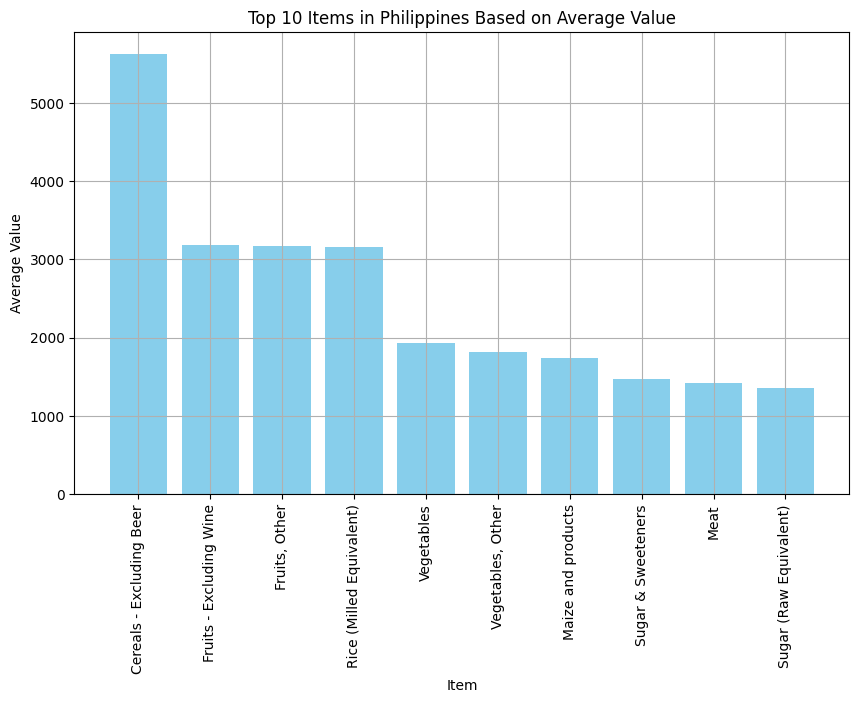

In [35]:
# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Get the most recent year dynamically
year_columns = [col for col in fao_top.columns if col.startswith('Y')]
most_recent_year = max(year_data, key=lambda x: int(x[1:]))

# Iterate over unique regions
regions = merged_df['region'].unique()
for region in regions:
    # Filter the data for the current region
    df_region = merged_df[merged_df['region'] == region]

    # Filter out rows with NaN values in the most recent year
    df_recent = df_region.dropna(subset=[most_recent_year])

    # Calculate the value for the most recent year per item for the current region
    df_recent_values = df_recent.groupby('item')[most_recent_year].sum().reset_index()
    df_recent_values = df_recent_values.rename(columns={most_recent_year: 'RecentYearValue'})

    # Get the top 10 items by least availability in the most recent year
    df_least10 = df_recent_values.sort_values(by='RecentYearValue', ascending=True).head(10)

In [36]:
most_recent_yearr = 'y2013'

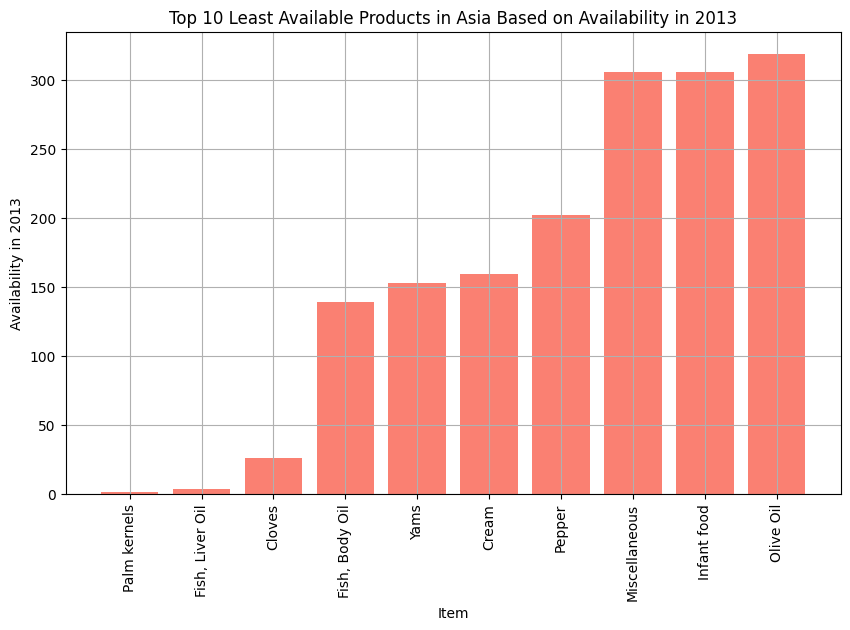

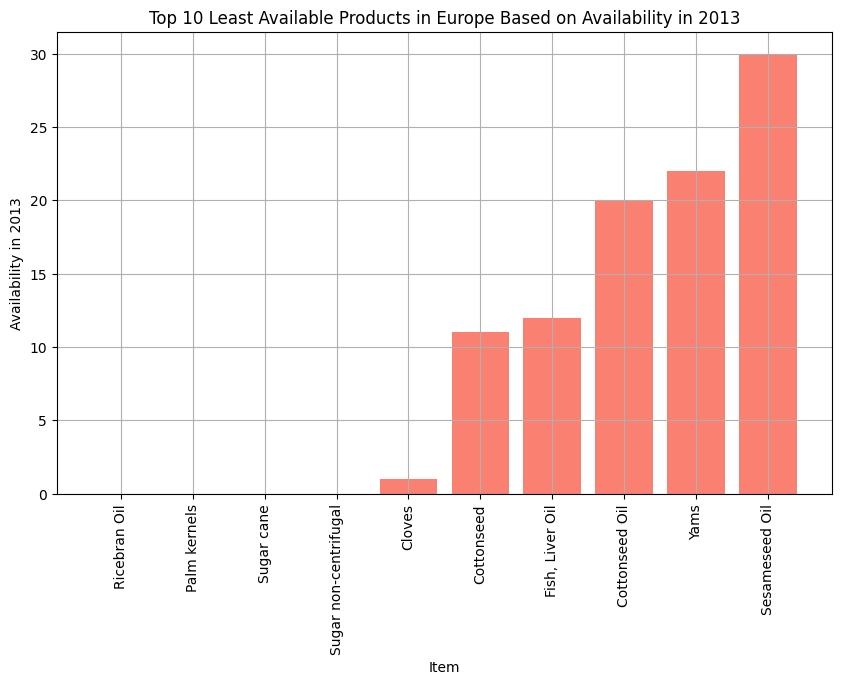

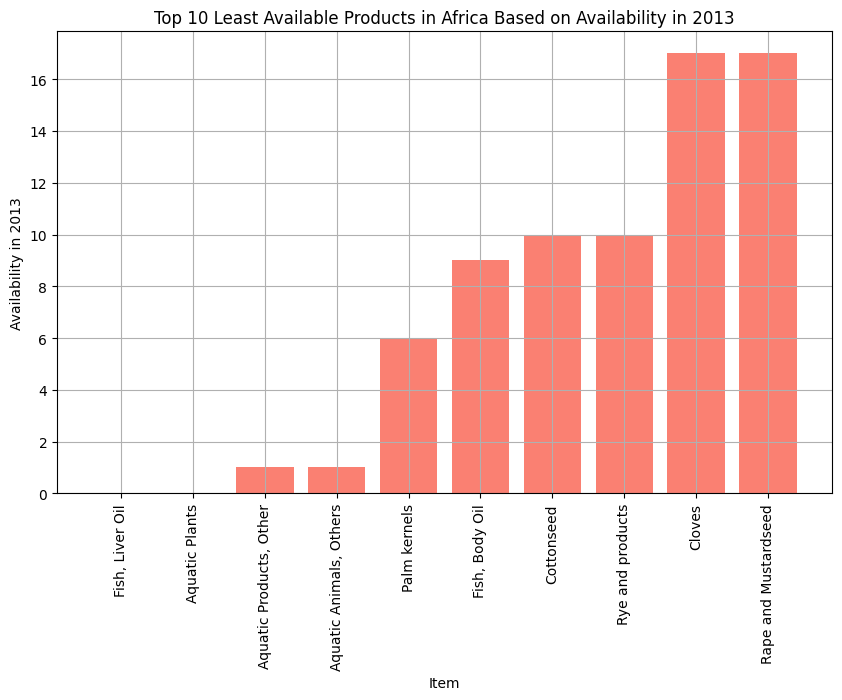

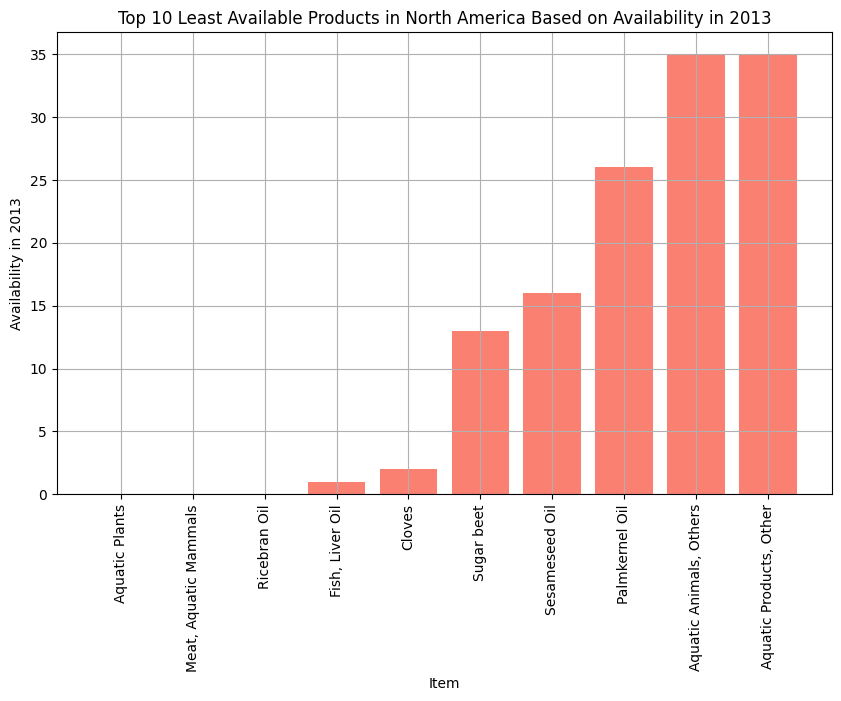

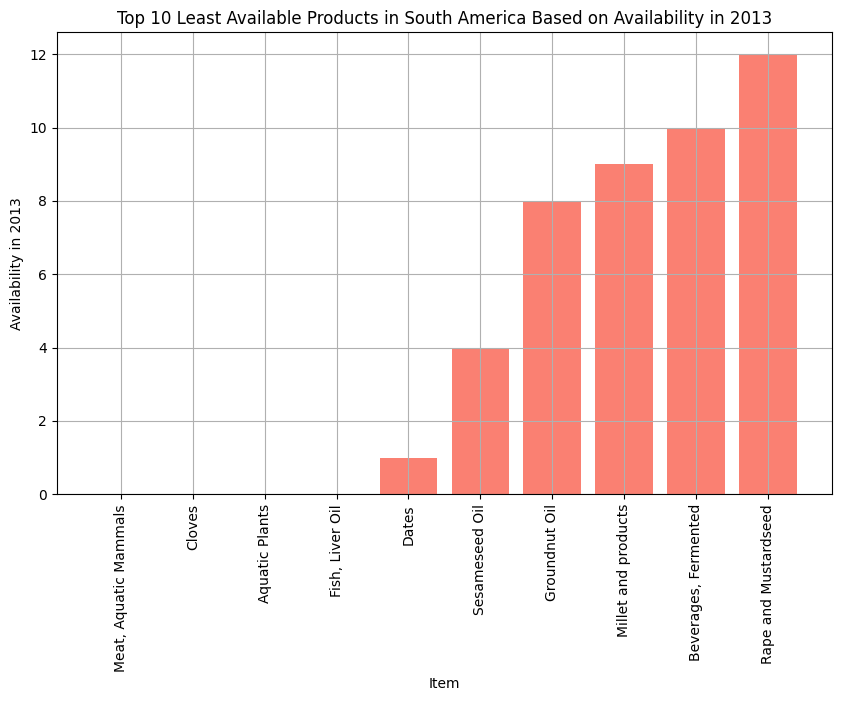

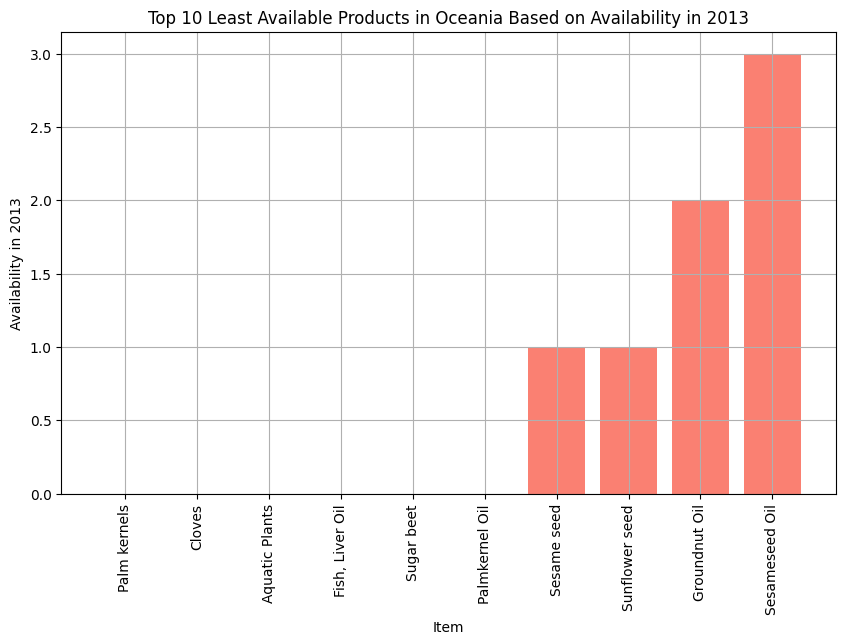

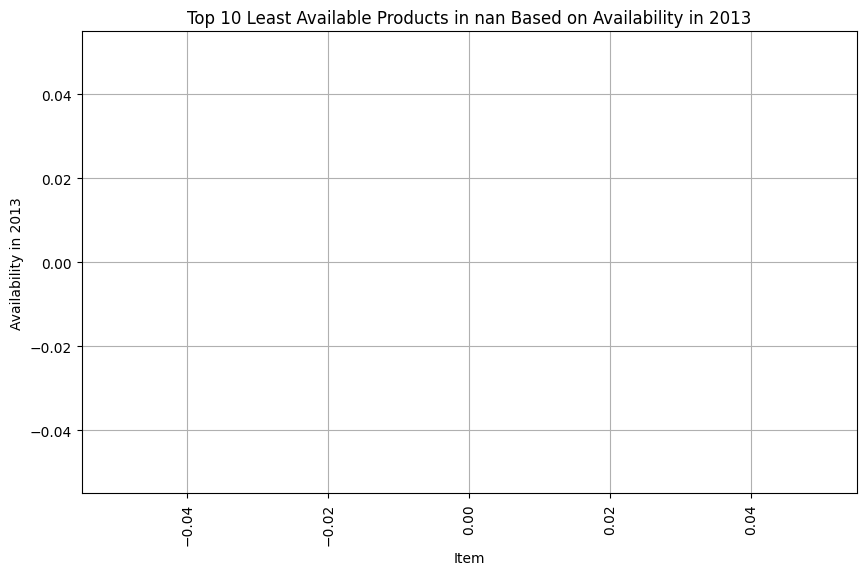

In [37]:
# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Iterate over unique regions
regions = merged_df['region'].unique()
for region in regions:
    # Filter the data for the current region
    df_region = merged_df[merged_df['region'] == region]

    # Get the column for the most recent year (Y2013 in this case)
    recent_year_column = 'y2013'

    # Filter out rows with NaN values in the most recent year
    df_recent = df_region.dropna(subset=[recent_year_column])

    # Calculate the value for the most recent year per item for the current region
    df_recent_values = df_recent.groupby('item')[recent_year_column].sum().reset_index()
    df_recent_values = df_recent_values.rename(columns={recent_year_column: 'RecentYearValue'})

    # Get the top 10 items by the least availability in the most recent year
    df_least10 = df_recent_values.sort_values(by='RecentYearValue', ascending=True).head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df_least10['item'], df_least10['RecentYearValue'], color='salmon')
    plt.title(f'Top 10 Least Available Products in {region} Based on Availability in 2013')
    plt.xlabel('Item')
    plt.ylabel('Availability in 2013')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

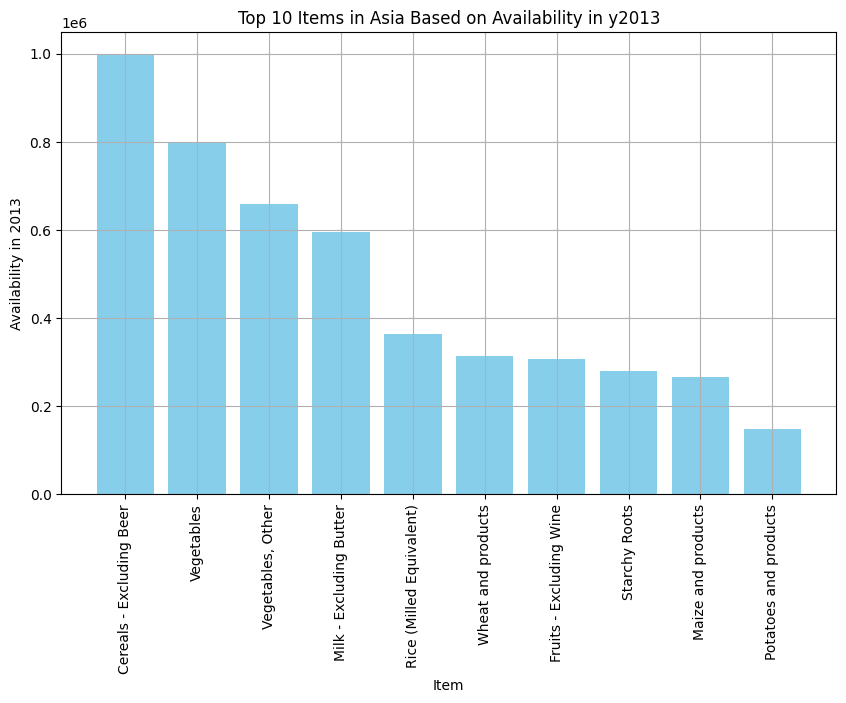

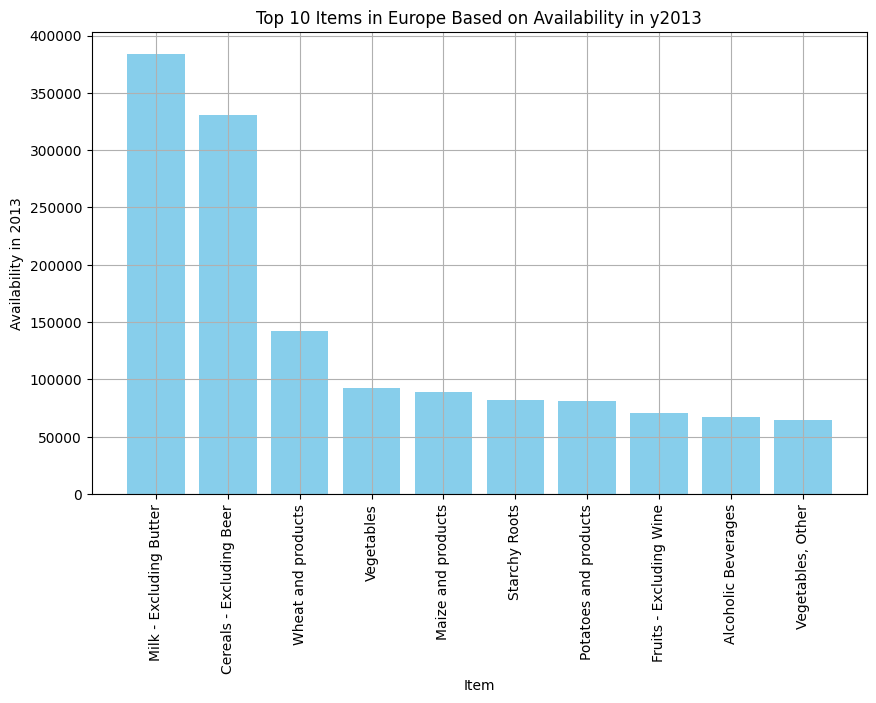

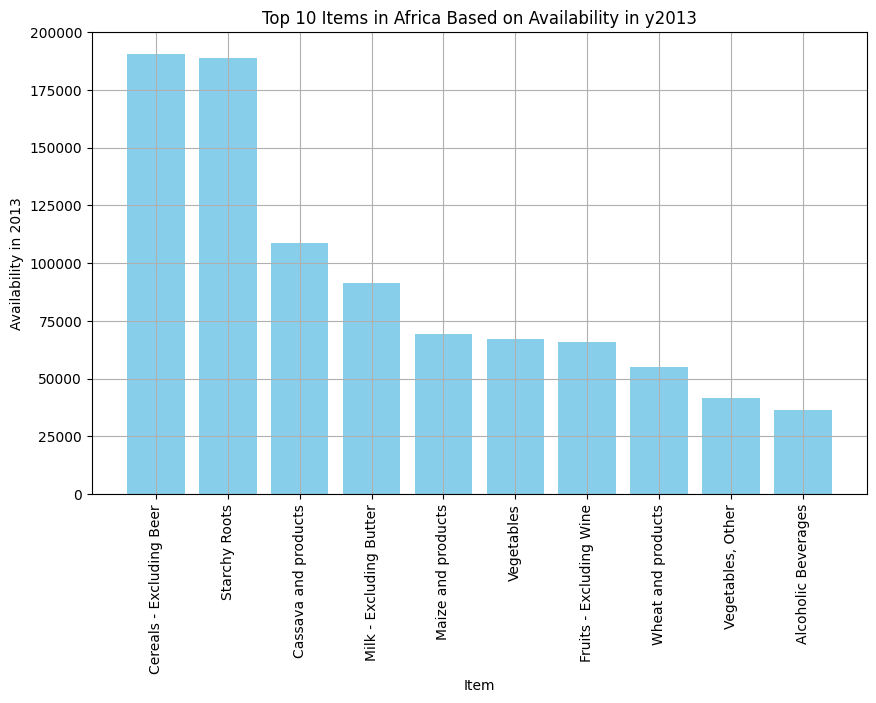

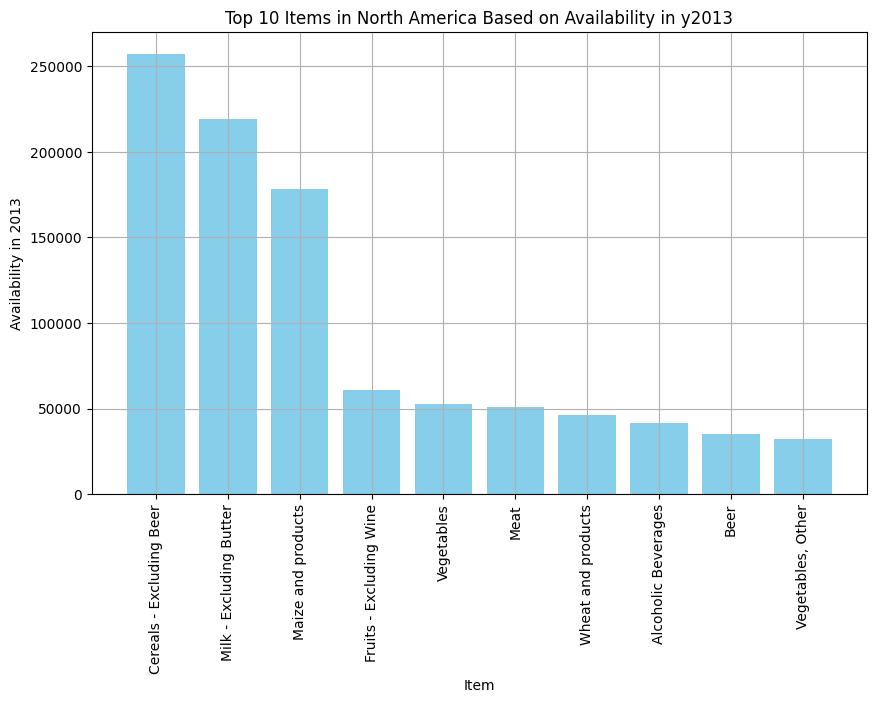

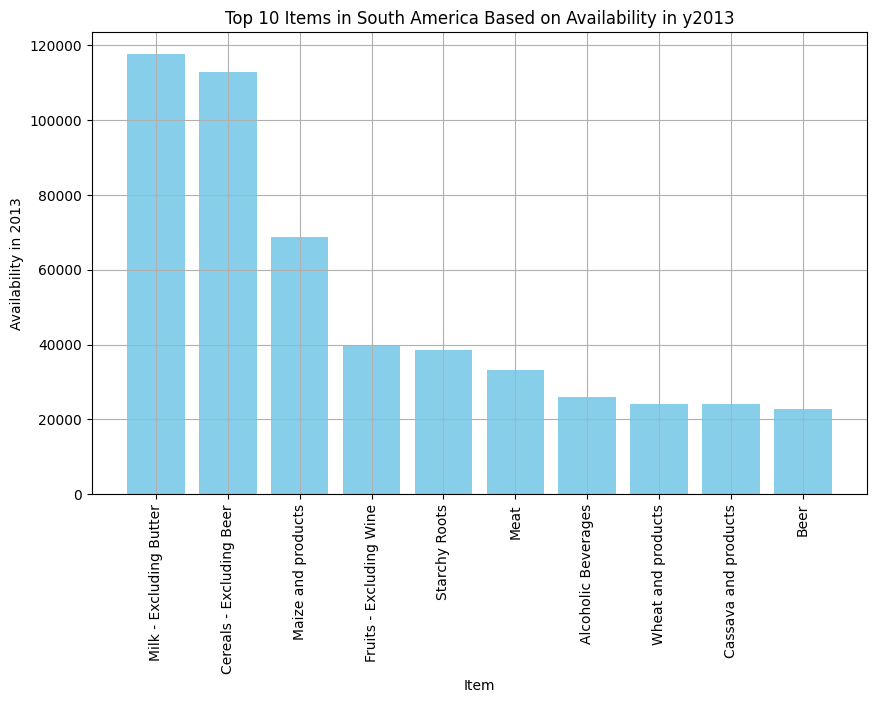

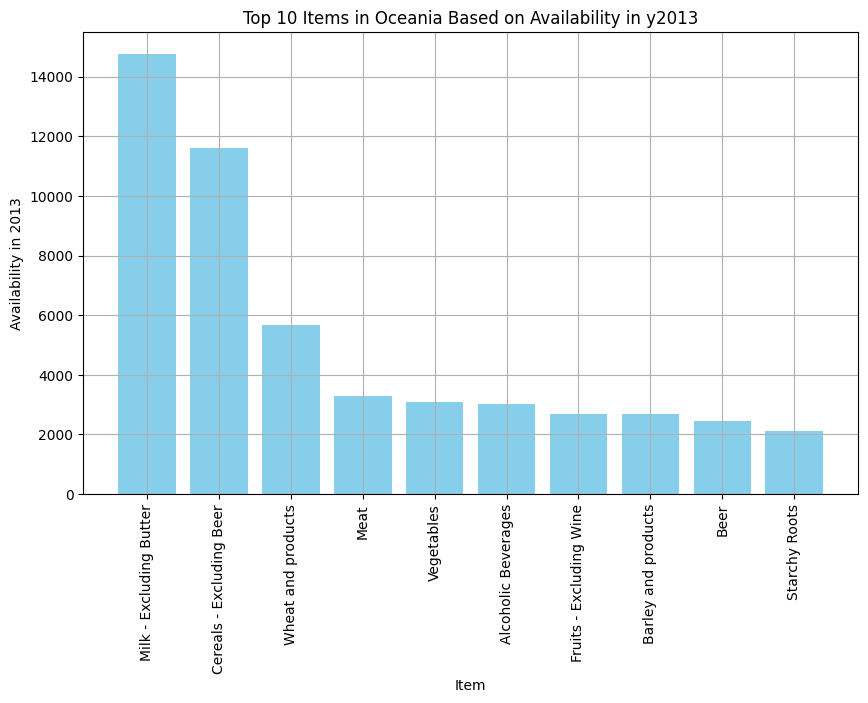

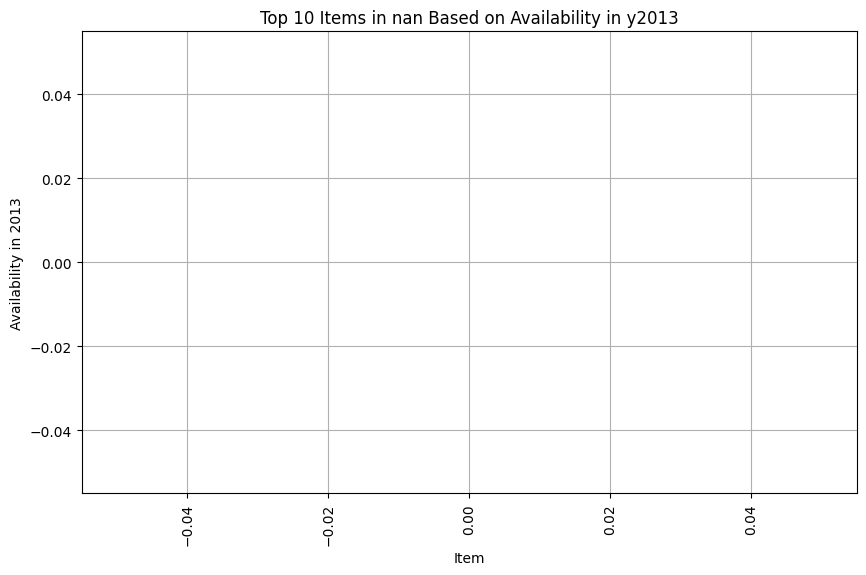

In [38]:
# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Iterate over unique regions
regions = merged_df['region'].unique()
for region in regions:
    # Filter the data for the current region
    df_region = merged_df[merged_df['region'] == region]

    # Get the column for the most recent year (Y2013 in this case)
    recent_year_column = 'y2013'

    # Filter out rows with NaN values in the most recent year
    df_recent = df_region.dropna(subset=[recent_year_column])

    # Calculate the value for the most recent year per item for the current region
    df_recent_values = df_recent.groupby('item')[recent_year_column].sum().reset_index()
    df_recent_values = df_recent_values.rename(columns={recent_year_column: 'RecentYearValue'})

    # Get the top 10 items by value in the most recent year
    df_top10 = df_recent_values.sort_values(by='RecentYearValue', ascending=False).head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df_top10['item'], df_top10['RecentYearValue'], color='skyblue')
    plt.title(f'Top 10 Items in {region} Based on Availability in {recent_year_column}')
    plt.xlabel('Item')
    plt.ylabel('Availability in 2013')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

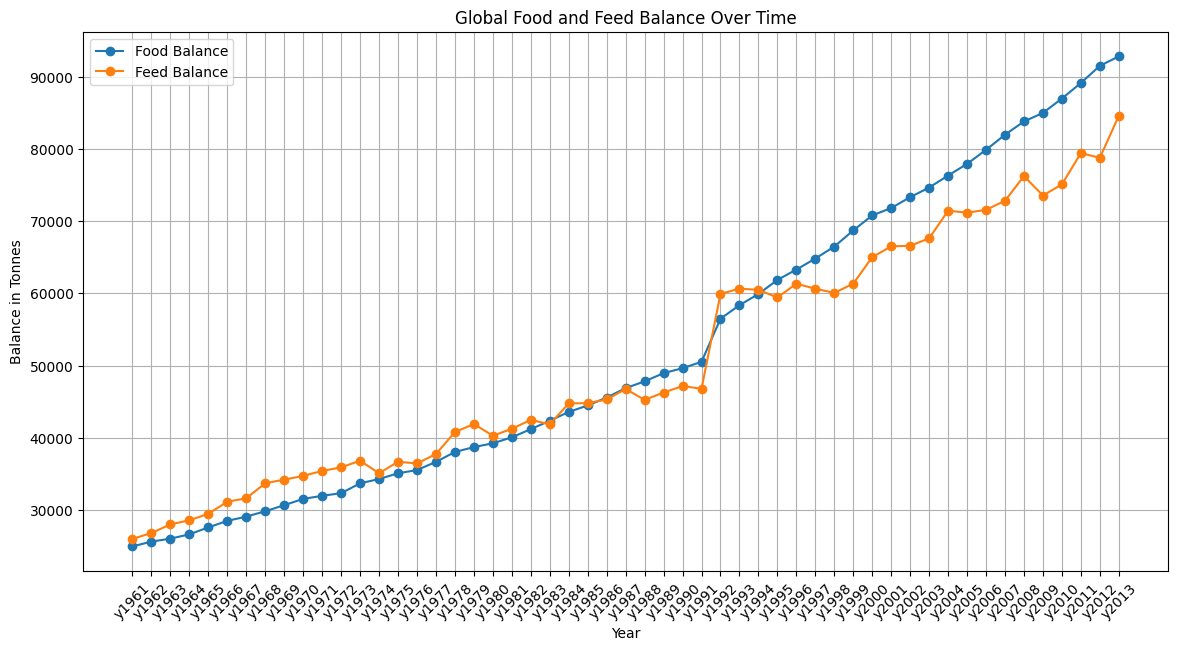

In [39]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df

# Step 1: Filter the data for Food and Feed
df_food = grouped_df[grouped_df['element'] == 'Food']
df_feed = grouped_df[grouped_df['element'] == 'Feed']

# Step 2: Sum the values for each year for Food and Feed
food_balance = df_food.loc[:, 'y1961':'y2013'].sum()
feed_balance = df_feed.loc[:, 'y1961':'y2013'].sum()

# Step 3: Create the time series
food_time_series = pd.Series(food_balance, name='Food Balance')
feed_time_series = pd.Series(feed_balance, name='Feed Balance')

# Optionally, you can combine them into a single DataFrame for easier comparison
global_balance = pd.DataFrame({
    'Food Balance': food_time_series,
    'Feed Balance': feed_time_series
})

plt.figure(figsize=(14, 7))
plt.plot(global_balance.index, global_balance['Food Balance'], label='Food Balance', marker='o')
plt.plot(global_balance.index, global_balance['Feed Balance'], label='Feed Balance', marker='o')

plt.title('Global Food and Feed Balance Over Time')
plt.xlabel('Year')
plt.ylabel('Balance in Tonnes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Both feed and food are linearly equal. However, observing the graph, the slow decline of feeds globally could raise concern over time to maintain global food security. It is also observed that from 1960 to 1986, the demand for food was low; therefore, the global economy could focus on the feed supply. However, over time, as the population increases, the balance of food security also diverges. In 1998, the United Nations stated that according to the FAO report, weather-related crop damage leads to less domestic food availability (UN, 1998). Observing the graph in the year 1995, the trend line for the feeds slowly diverged from the linear increase in food. The trendline of food availability also indicates that despite the rapid growth in the population, its linear increase might need to catch up with the demand for food.


Source:
WORLDWIDE NUMBER OF HUNGRY PEOPLE RISING AS LITTLE PROGRESS IS REGISTERED IN REDUCING POVERTY, ACCORDING TO FAO REPORT | Meetings coverage and press releases. (1998, November 27). https://press.un.org/en/1998/19981127.sag20.html

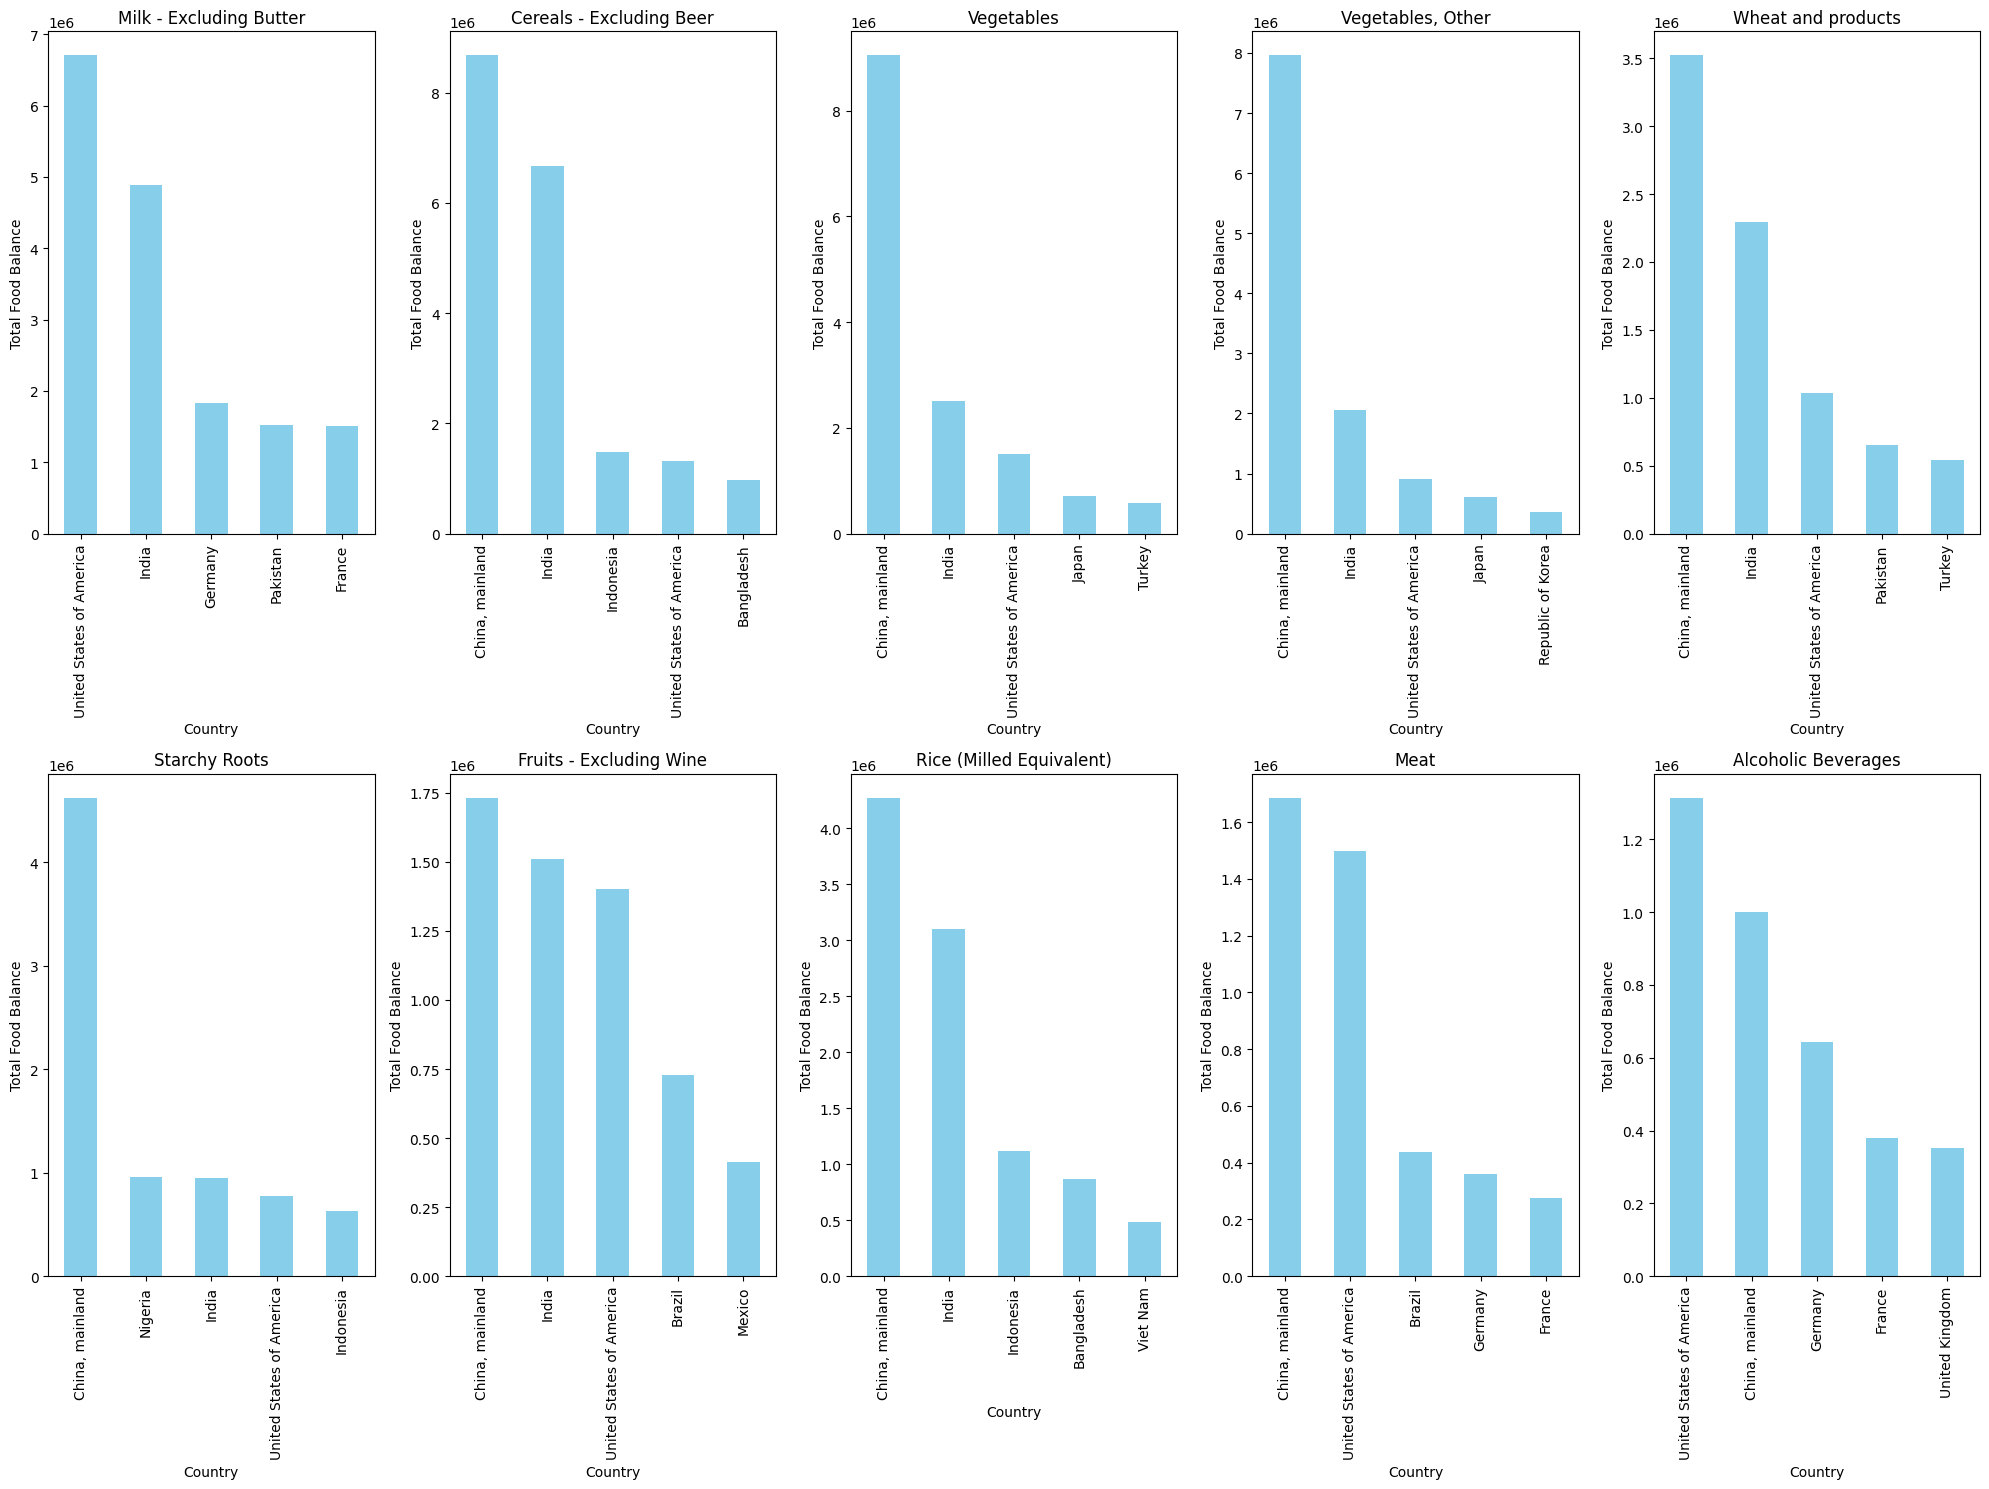

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food']

# Step 2: Sum the food balance across all years for each country and item
food_balance_sum = df_food.groupby(['area', 'item']).sum().loc[:, 'y1961':'y2013'].sum(axis=1)

# Step 3: Sum the food balance globally by item
global_food_balance = food_balance_sum.groupby('item').sum()

# Step 4: Find the top 10 most exported items
top_10_items = global_food_balance.sort_values(ascending=False).head(10).index

# Step 5: For each top item, find the top 5 countries
top_5_countries_per_item = {}
for item in top_10_items:
    top_5_countries_per_item[item] = food_balance_sum.loc[pd.IndexSlice[:, item]].sort_values(ascending=False).head(5)

# Step 6: Plot the bar graphs
plt.figure(figsize=(20, 15))
for i, (item, top_5) in enumerate(top_5_countries_per_item.items(), start=1):
    plt.subplot(2, 5, i)
    top_5.plot(kind='bar', title=item, color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Total Food Balance')

plt.tight_layout()
plt.show()

The global food production landscape is characterized by the dominance of a few key players, particularly the United States, India, and China. The United States stands out in various high-calorie food categories, such as milk, cereals, meat, and alcoholic beverages, underscoring its significant role in global agriculture, especially in livestock and staple crop production. China and India are also prominent, with China leading in cereals, vegetables, and starchy roots, and India excelling in cereals and milk production. The substantial production in these populous nations largely serves domestic consumption, highlighting their agricultural capacity but also their reliance on internal demand.

Region-specific specializations are evident, with China focusing on staple food items, India on cereals and milk, and the United States on a diverse agricultural base, including meat and alcoholic beverages. European countries like France and Germany show strength in milk, cereals, and alcoholic beverages, reflecting their agricultural traditions. Emerging markets such as Brazil and Indonesia are gaining prominence in cereals, fruits, and starchy roots, with Brazil also becoming a major meat exporter.

The dominance of certain countries in specific food categories raises concerns about global food security, trade dependencies, and environmental sustainability. The reliance on a few nations for critical food supplies makes the global food system vulnerable to disruptions from geopolitical instability, natural disasters, or trade disputes. Additionally, the environmental impact of high livestock production in countries like the United States and Brazil underscores the need for sustainable agricultural practices.

To address these challenges, diversification of supply sources, investment in emerging markets, and innovation in agricultural practices are recommended. This includes enhancing infrastructure and technology in countries like Brazil and Indonesia, promoting sustainable farming methods, and encouraging agricultural diversification to reduce economic risks. Furthermore, the potential effects of climate change and geopolitical tensions on food production necessitate proactive strategies to maintain global food security and supply chain stability.

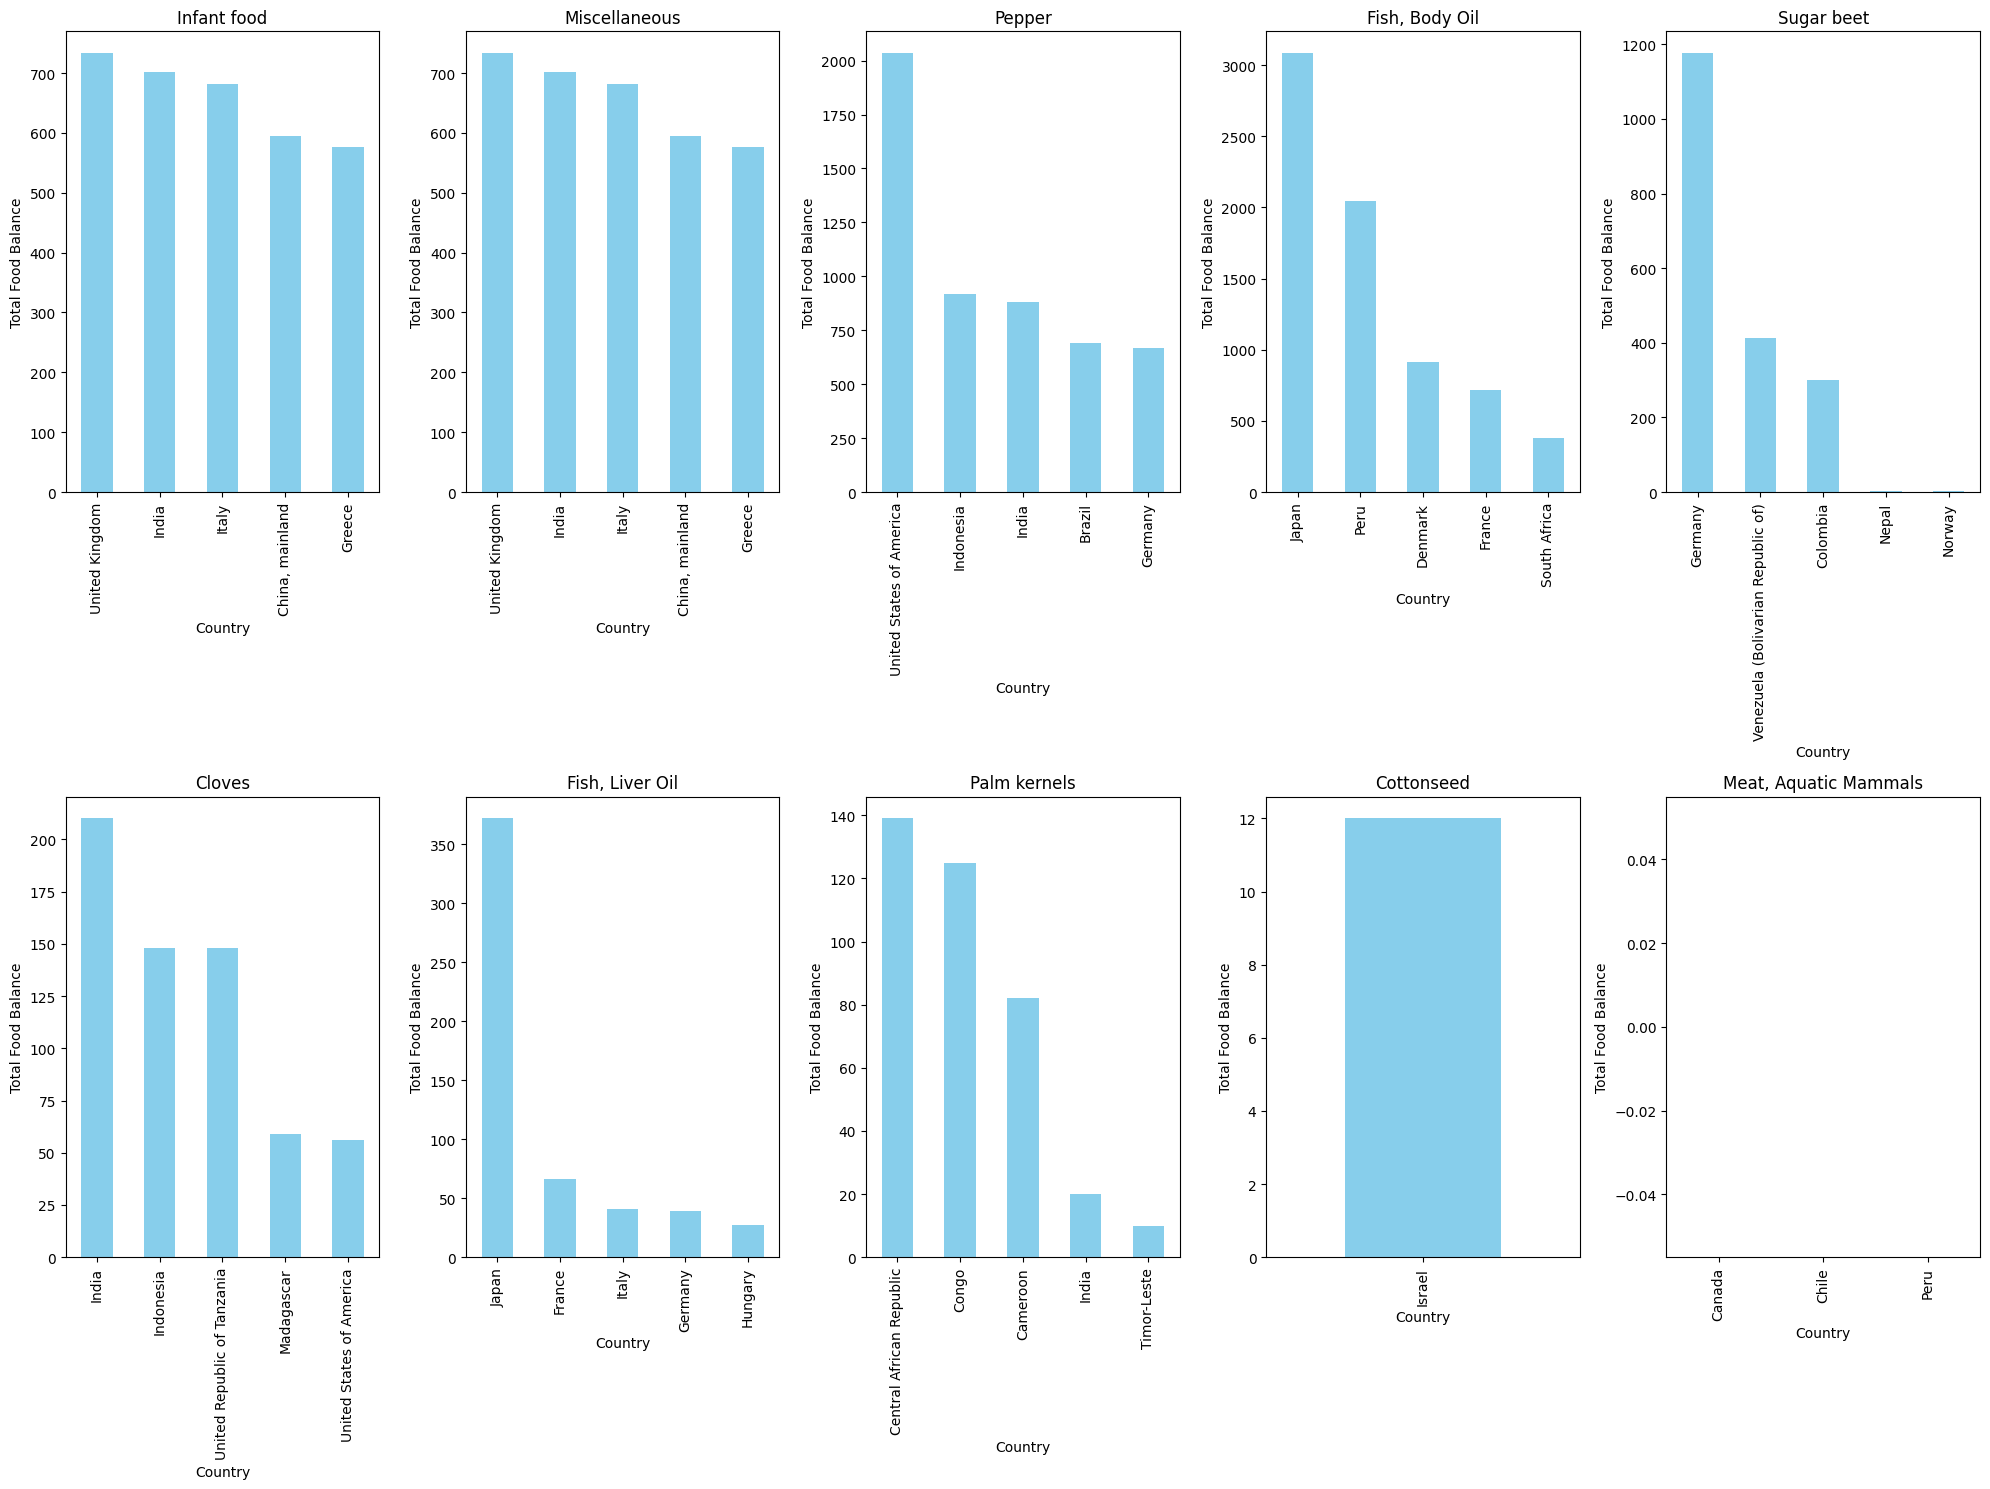

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food']

# Step 2: Sum the food balance across all years for each country and item
food_balance_sum = df_food.groupby(['area', 'item']).sum().loc[:, 'y1961':'y2013'].sum(axis=1)

# Step 3: Sum the food balance globally by item
global_food_balance = food_balance_sum.groupby('item').sum()

# Step 4: Find the top 10 most exported items
top_10_items = global_food_balance.sort_values(ascending=False).tail(10).index

# Step 5: For each top item, find the top 5 countries
top_5_countries_per_item = {}
for item in top_10_items:
    top_5_countries_per_item[item] = food_balance_sum.loc[pd.IndexSlice[:, item]].sort_values(ascending=False).head(5)

# Step 6: Plot the bar graphs
plt.figure(figsize=(20, 15))
for i, (item, top_5) in enumerate(top_5_countries_per_item.items(), start=1):
    plt.subplot(2, 5, i)
    top_5.plot(kind='bar', title=item, color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Total Food Balance')

plt.tight_layout()
plt.show()

In contrast to the top 10 globally traded food items, which are dominated by major exporters like the United States, China, and India, the bottom 10 items showcase a more diverse range of exporters. This diversity suggests that smaller or specialized markets are spread out more globally, often reflecting specific geographic or climatic advantages. For instance, items like cloves, palm kernels, and fish liver oil are primarily exported by countries with suitable climates or access to particular natural resources, such as Madagascar and Indonesia for cloves, and the Central African Republic and Ghana for palm kernels.

These bottom-tier items are typically niche or low-calorie products, such as meat from aquatic mammals, fish liver oil, and cottonseed. Their specialized nature and limited global demand result in smaller, more focused markets compared to staple foods like cereals or meats. The export volumes for these items are significantly lower, underscoring their niche status and relatively lower demand in the global market. This is particularly evident in the negligible global food balance for items like meat from aquatic mammals, especially when compared to high-demand staples.

Developing nations often play a significant role in exporting these niche items, finding economic opportunities by focusing on products indigenous to their regions or requiring specific climatic conditions. The implications of this trend include opportunities for these countries to enhance the quality and marketing of their products to expand their niche markets globally. They could benefit from certifications like organic or fair trade to appeal to specific consumer bases.

Given the environmental impact associated with the production of some of these items, particularly animal-related products, there is a need for exporting countries to invest in sustainable practices to ensure the long-term viability of these industries. Moreover, countries that rely heavily on a few niche items may benefit from diversifying their agricultural exports to mitigate risks associated with market volatility or shifts in global demand.

The impacts of climate change also pose a significant threat to these specialized products, given their dependence on specific environmental conditions. Exporters should invest in research and development to adapt to these changes and safeguard their agricultural outputs. Additionally, developing value-added products, such as processing raw palm kernels or cloves into oils or extracts, could enhance the economic value of exports, allowing countries to fetch higher prices on the international market.

However, it is crucial to consider the accuracy of the data used in this analysis, as small discrepancies could significantly affect the perceived market dominance of these countries. Furthermore, economic and policy shifts, changes in domestic policies, international trade agreements, or fluctuations in global demand could greatly impact these niche markets, making them more volatile and sensitive compared to staple commodities.

In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt


#     # Assuming 'fao' is your original DataFrame
#     # Drop unnecessary columns
#     # drop all values with the element value Feed
# fao_average = fao[fao['element'] != 'Feed']

# fao_average = fao_average.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])
# for c in countries:
#     # Step 2: Filter data by country
#     country = c  # Replace with the specific country name
#     df_country = fao_average[fao_average['area'] == country]

#     # Step 3: Reshape the data
#     # Identify the year columns (assuming they start with 'y')
#     year_columns = [col for col in df_country.columns if col.startswith('y')]

#     # Melt the DataFrame to have 'Year' as a single column
#     df_melted = df_country.melt(id_vars=['area', 'item'], value_vars=year_columns, var_name='Year', value_name='Value')

#     # Remove the 'y' prefix from the 'Year' column to get the actual year as an integer
#     df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

#     # Get the average trhoughout the years for each item and create a new column
#     df_melted['Average'] = df_melted.groupby('item')['Value'].transform('mean')

#     # drop all the items that has an average below 500
#     df_melted = df_melted[df_melted['Average'] > 500]
#     if df_melted.empty:
#         df_melted = df_melted[df_melted['Average'] > 100]
#     # Verify the output
#     print(df_melted.head())

#     # drop all items with the value 0 an all years
#     df_melted = df_melted[df_melted['Value'] != 0]

#     # Plotting the data
#     plt.figure(figsize=(10, 6))
#     for item in df_melted['item'].unique():
#         df_item = df_melted[df_melted['item'] == item]
#         plt.plot(df_item['Year'], df_item['Value'], marker='o', label=item)

#     # Customize the plot
#     plt.title(f'Trend of Items in {country}')
#     plt.xlabel('Year')
#     plt.ylabel('Value')
#     plt.legend(title='Item')
#     plt.grid(True)

#     # Display the plot
#     plt.show()


                            item  AverageValue
19                        Cloves      0.000000
26                         Dates      0.000000
4                 Aquatic Plants      0.000000
93                    Sugar beet      0.000000
31               Fish, Liver Oil      0.000000
40                         Honey      0.037736
30                Fish, Body Oil      0.037736
61  Olives (including preserved)      0.094340
70                       Pimento      0.132075
77          Rape and Mustardseed      0.188679


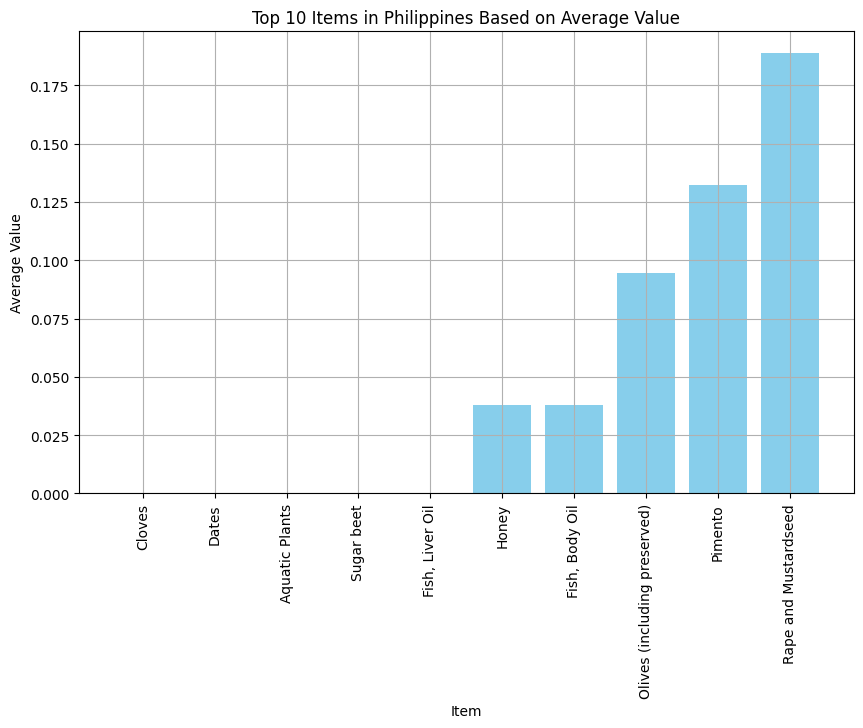

In [88]:
fao_least = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])
country = 'Philippines'
df_country = fao_least[fao_least['area'] == country]
year_columns = [col for col in df_country.columns if col.startswith('y')]

df_melted = df_country.melt(id_vars=['area', 'item'], value_vars=year_columns, var_name='Year', value_name='Value')

df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

df_average = df_melted.groupby('item')['Value'].mean().reset_index()

df_average = df_average.rename(columns={'Value': 'AverageValue'})

df_top10 = df_average.sort_values(by='AverageValue', ascending=True).head(10)

print(df_top10)

plt.figure(figsize=(10, 6))
plt.bar(df_top10['item'], df_top10['AverageValue'], color='skyblue')
plt.title(f'Top 10 Items in {country} Based on Average Value')
plt.xlabel('Item')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

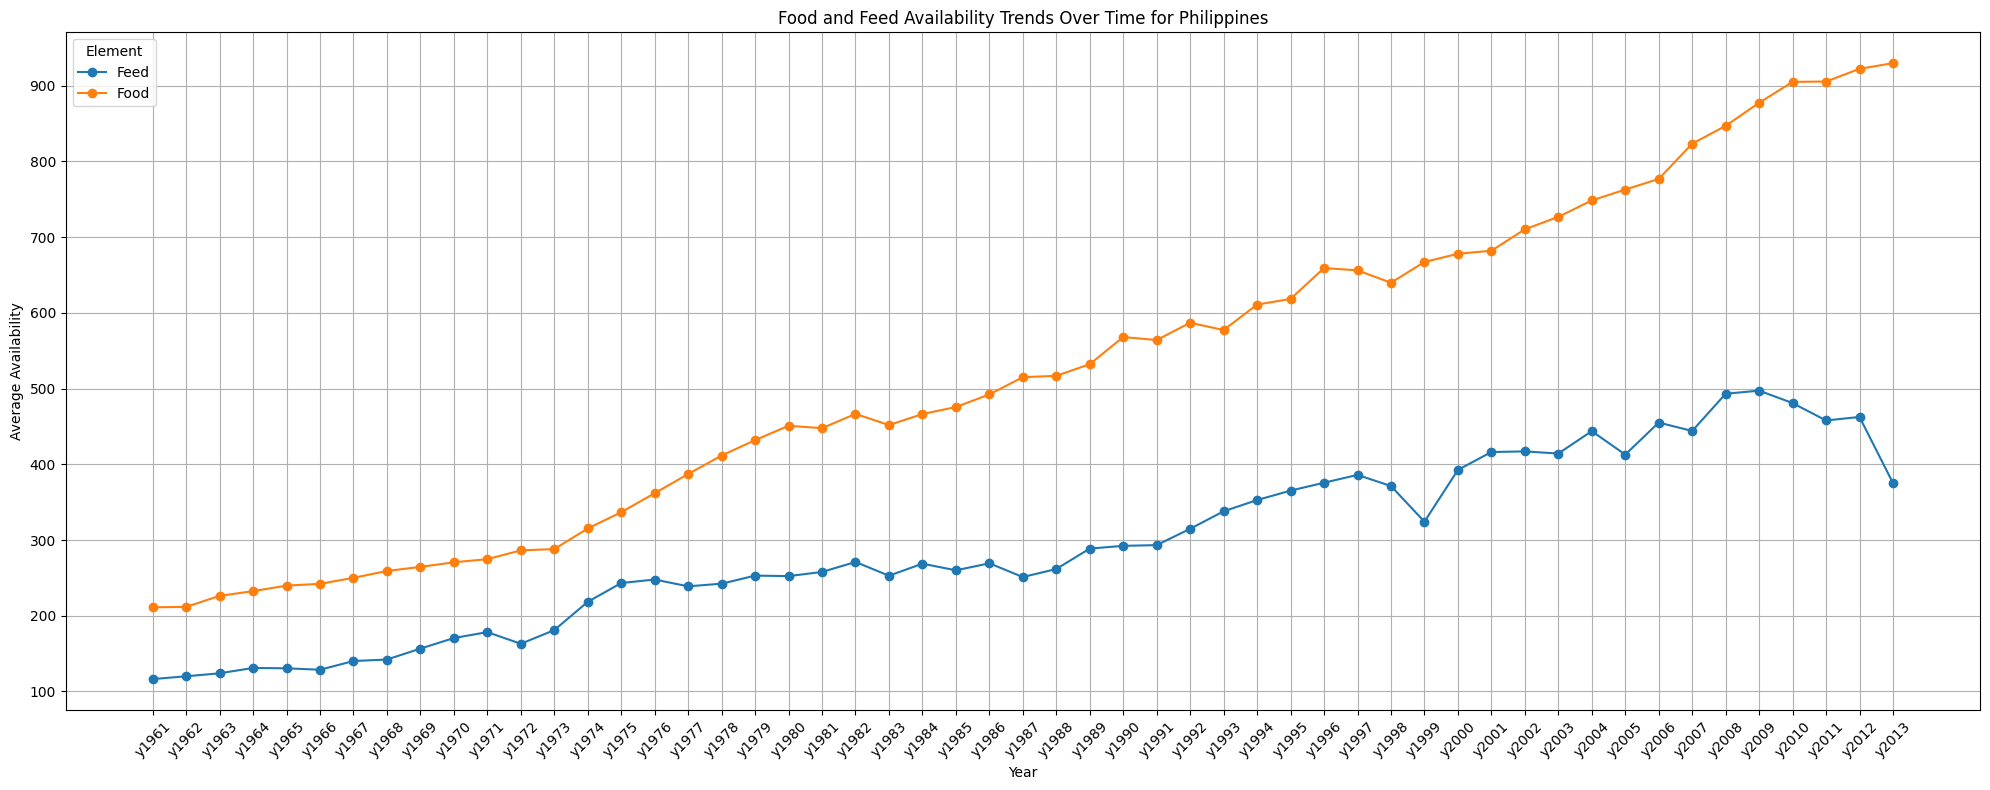

In [89]:
# Selected country
selected_country = 'Philippines'

# Filter data for the selected country
country_data = grouped_df[grouped_df['area'] == selected_country]

plt.figure(figsize=(20, 8))

# Plot each element's data over the years
for element in country_data['element'].unique():
        element_data = country_data[country_data['element'] == element]
        plt.plot(year_columns, element_data[year_columns].values.flatten(), marker='o', label=element)

# Customize plot
plt.title(f'Food and Feed Availability Trends Over Time for {selected_country}')
plt.xlabel('Year')
plt.ylabel('Average Availability')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Element')
plt.tight_layout()
plt.show()

                         item  AverageValue
16   Cereals - Excluding Beer   8266.886792
77   Rice (Milled Equivalent)   6061.698113
34    Fruits - Excluding Wine   5968.528302
101                Vegetables   3856.188679
102         Vegetables, Other   3636.000000
35              Fruits, Other   3176.396226
86              Starchy Roots   2121.075472
6                     Bananas   2091.018868
32              Fish, Seafood   1919.622642
88         Sugar & Sweeteners   1465.528302


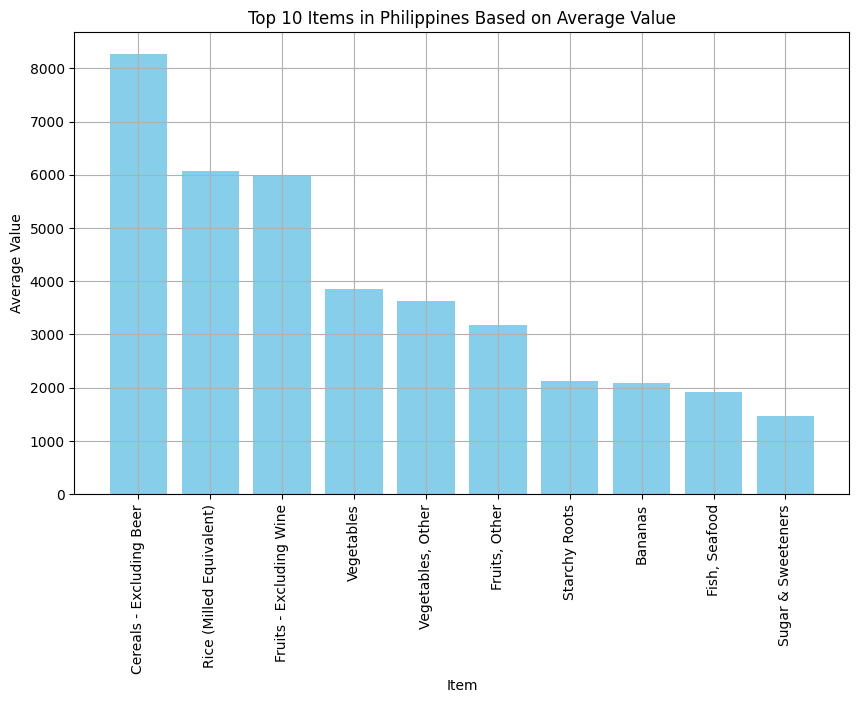

In [100]:

fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])
fao_top = fao_top[fao_top['element'] != 'Feed']
country = 'Philippines'


df_country = fao_top[fao_top['area'] == country]
year_columns = [col for col in df_country.columns if col.startswith('y')]

df_melted = df_country.melt(id_vars=['area', 'item'], value_vars=year_columns, var_name='Year', value_name='Value')

df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

df_average = df_melted.groupby('item')['Value'].mean().reset_index()

df_average = df_average.rename(columns={'Value': 'AverageValue'})

df_top10 = df_average.sort_values(by='AverageValue', ascending=False).head(10)

print(df_top10)

plt.figure(figsize=(10, 6))
plt.bar(df_top10['item'], df_top10['AverageValue'], color='skyblue')
plt.title(f'Top 10 Items in {country} Based on Average Value')
plt.xlabel('Item')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

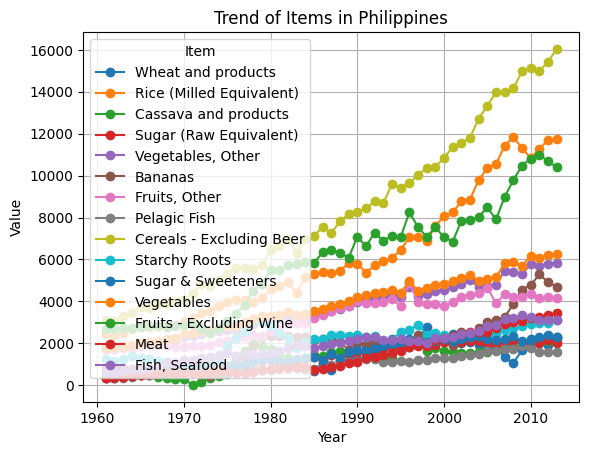

In [101]:
import matplotlib.pyplot as plt

# Assuming 'fao' is your original DataFrame
# Drop unnecessary columns and rows where 'element' is 'Feed'
fao_average = fao[fao['element'] != 'Feed']
fao_average = fao_average.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Step 2: Filter data by country
country = 'Philippines'  # Replace with the specific country name
df_country = fao_average[fao_average['area'] == country]

# Step 3: Reshape the data
# Identify the year columns (assuming they start with 'y')
year_columns = [col for col in df_country.columns if col.startswith('y')]

# Melt the DataFrame to have 'Year' as a single column
df_melted = df_country.melt(id_vars=['area', 'item'], value_vars=year_columns, var_name='Year', value_name='Value')

# Remove the 'y' prefix from the 'Year' column to get the actual year as an integer
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

# Get the average throughout the years for each item and create a new column
df_avg = df_melted.groupby('item')['Value'].mean().reset_index()
df_avg = df_avg.rename(columns={'Value': 'Average'})

# Merge the average values back with the melted DataFrame
df_melted = df_melted.merge(df_avg, on='item', how='left')

# Filter the DataFrame to only include items with an average value greater than 100
df_melted = df_melted[df_melted['Average'] > 2000]

# Plot the data for each item
for item in df_melted['item'].unique():
    df_item = df_melted[df_melted['item'] == item]
    plt.plot(df_item['Year'], df_item['Value'], marker='o', label=item)

# Customize the plot
plt.title(f'Trend of Items in {country}')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Item')
plt.grid(True)

# Display the plot
plt.show()


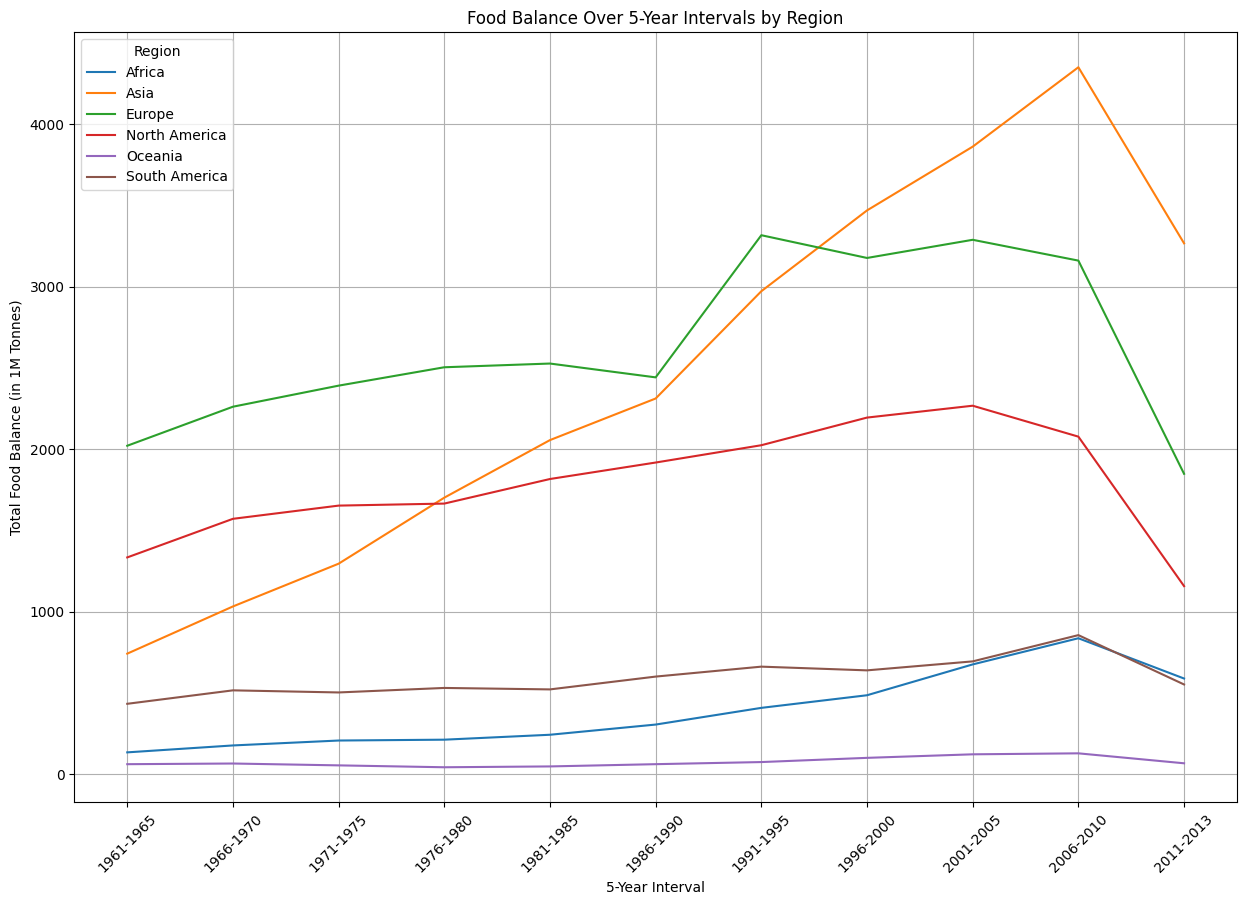

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food'].copy()  # Use .copy() to avoid modifying the original DataFrame
df_food = merged_df[merged_df['element'] == 'Feed'].copy()

# Step 2: Aggregate the data in 5-year intervals
# Define the 5-year intervals
intervals = {
    '1961-1965': ['y1961', 'y1962', 'y1963', 'y1964', 'y1965'],
    '1966-1970': ['y1966', 'y1967', 'y1968', 'y1969', 'y1970'],
    '1971-1975': ['y1971', 'y1972', 'y1973', 'y1974', 'y1975'],
    '1976-1980': ['y1976', 'y1977', 'y1978', 'y1979', 'y1980'],
    '1981-1985': ['y1981', 'y1982', 'y1983', 'y1984', 'y1985'],
    '1986-1990': ['y1986', 'y1987', 'y1988', 'y1989', 'y1990'],
    '1991-1995': ['y1991', 'y1992', 'y1993', 'y1994', 'y1995'],
    '1996-2000': ['y1996', 'y1997', 'y1998', 'y1999', 'y2000'],
    '2001-2005': ['y2001', 'y2002', 'y2003', 'y2004', 'y2005'],
    '2006-2010': ['y2006', 'y2007', 'y2008', 'y2009', 'y2010'],
    '2011-2013': ['y2011', 'y2012', 'y2013'],  # Last interval with 3 years only
}

# Step 2.1: Create new columns for each interval, summing the respective years
for interval, years in intervals.items():
    df_food.loc[:, interval] = df_food.loc[:, years].sum(axis=1)/1000

# Step 3: Aggregate by region and interval
# We need to aggregate based on these new interval columns
region_time_series = df_food.groupby('region')[list(intervals.keys())].sum()

# Step 4: Plot the time series for each region
plt.figure(figsize=(15, 10))
for region in region_time_series.index:
    plt.plot(region_time_series.columns, region_time_series.loc[region], label=region)

plt.title('Food Balance Over 5-Year Intervals by Region')
plt.xlabel('5-Year Interval')
plt.ylabel('Total Food Balance (in 1M Tonnes)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Asia has demonstrated a significant and consistent increase in food balance over the decades, peaking around 2006-2010 before experiencing a noticeable decline in the 2011-2013 period. Europe, on the other hand, showed consistent growth until the early 1990s, after which its food balance stabilized and eventually declined post-2001-2005. North America followed a similar pattern, with steady growth in food balance until the 2000s, after which it plateaued and began to decline after 2006-2010. Africa’s food balance has grown slowly but steadily, though it also saw a minor decline in the 2011-2013 period. South America and Oceania exhibited much slower growth in food balance compared to other regions, with South America slightly outperforming Oceania.

To strengthen food security in Asia, it is recommended that the region diversifies its food sources and improves agricultural productivity to counter the decline in food balance observed post-2010. Investing in infrastructure, such as enhanced storage, transportation, and distribution networks, could also help minimize food losses and ensure consistent food availability.

For Europe and North America, where food balance has declined, stronger sustainability initiatives are necessary. This includes reducing food waste, optimizing resource use in agriculture, and increasing local food production. Policy interventions by governments to support local farmers and promote sustainable agricultural practices would also be beneficial.

In Africa, boosting agricultural output is crucial. Investments in agricultural technology and infrastructure could improve yields and enhance food security. Additionally, addressing climate change through climate-resilient farming practices is vital to counter the challenges posed by environmental changes.

South America and Oceania, with their slower growth, could benefit from enhancing their food export potential by focusing on quality and establishing trade partnerships. Increasing domestic agricultural production could also help these regions improve their food balance and reduce reliance on imports.

Several factors may explain these trends. Asia's rapid economic growth likely drove the initial increase in food balance, but the recent decline could be due to increased consumption or export pressures. Population dynamics, particularly in Asia and Africa, have likely increased demand, putting pressure on food balance. Changes in global trade policies and agreements may have also impacted food balance, especially in Europe and North America. Additionally, climate change may have adversely affected agricultural productivity, particularly in Asia and Africa, influencing these trends.

To address these issues, regions should implement robust food security plans that account for potential climate change impacts and economic fluctuations. Encouraging sustainable agricultural practices is essential for ensuring long-term food availability. Monitoring population growth and managing it in line with food production capacities will help avoid potential shortages. Lastly, enhancing global cooperation and trade could stabilize food balances across regions, allowing food surpluses in one region to support deficits in another.

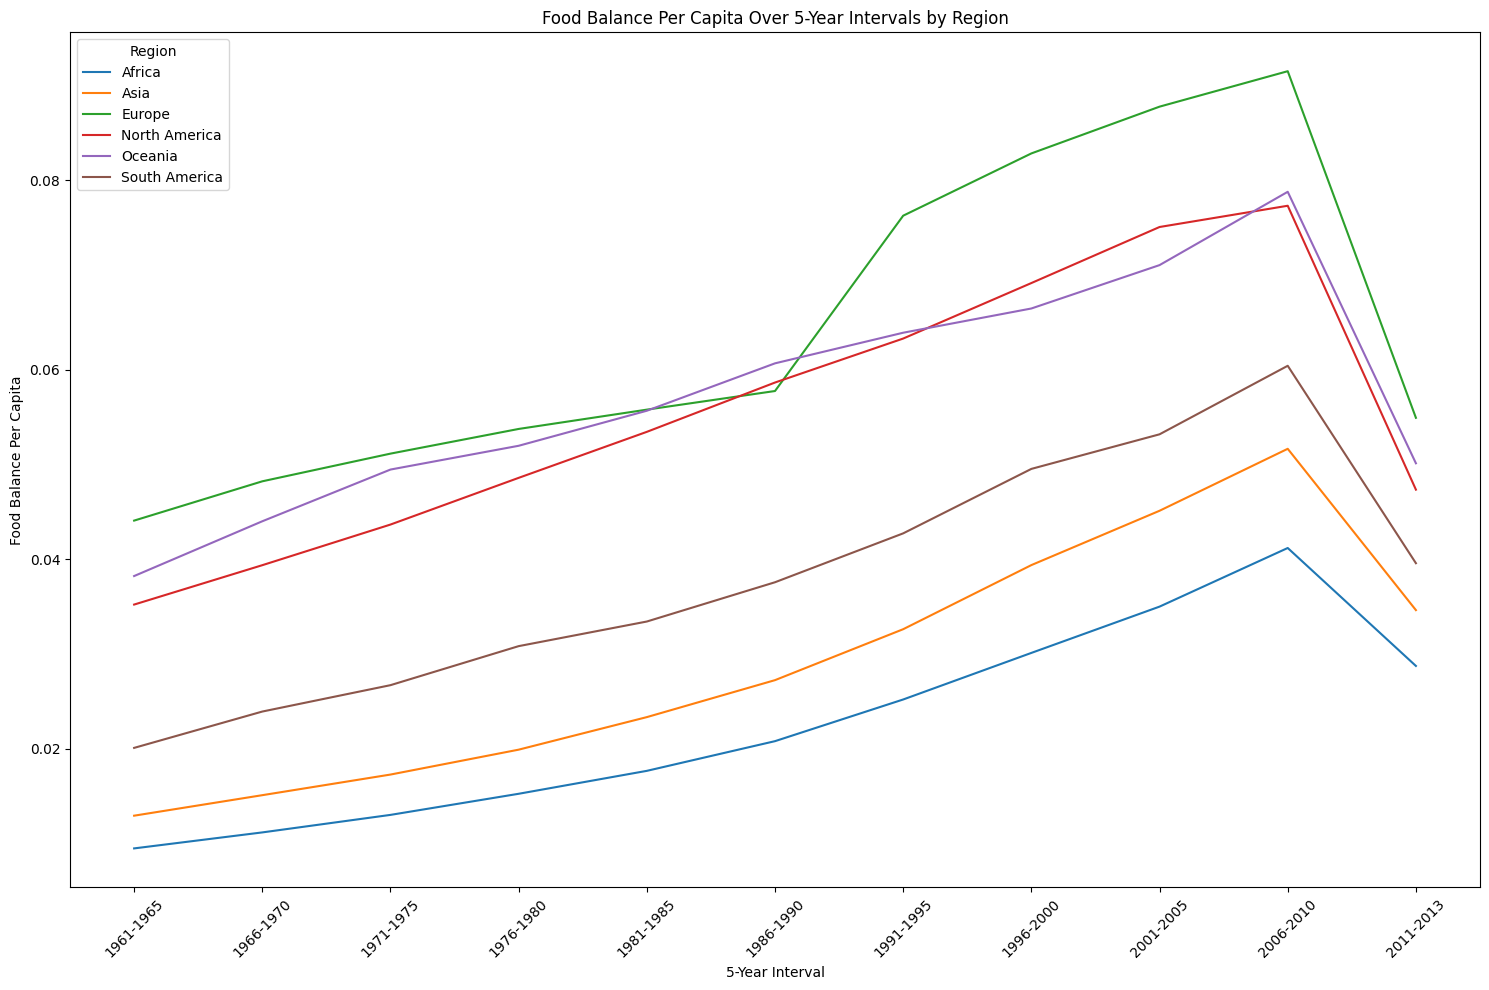

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food'].copy()  # Use .copy() to avoid modifying the original DataFrame

# Step 2: Aggregate the data in 5-year intervals
# Define the 5-year intervals
intervals = {
    '1961-1965': ['y1961', 'y1962', 'y1963', 'y1964', 'y1965'],
    '1966-1970': ['y1966', 'y1967', 'y1968', 'y1969', 'y1970'],
    '1971-1975': ['y1971', 'y1972', 'y1973', 'y1974', 'y1975'],
    '1976-1980': ['y1976', 'y1977', 'y1978', 'y1979', 'y1980'],
    '1981-1985': ['y1981', 'y1982', 'y1983', 'y1984', 'y1985'],
    '1986-1990': ['y1986', 'y1987', 'y1988', 'y1989', 'y1990'],
    '1991-1995': ['y1991', 'y1992', 'y1993', 'y1994', 'y1995'],
    '1996-2000': ['y1996', 'y1997', 'y1998', 'y1999', 'y2000'],
    '2001-2005': ['y2001', 'y2002', 'y2003', 'y2004', 'y2005'],
    '2006-2010': ['y2006', 'y2007', 'y2008', 'y2009', 'y2010'],
    '2011-2013': ['y2011', 'y2012', 'y2013'],  # Last interval with 3 years only
}

# Step 2.1: Create new columns for each interval, summing the respective years
for interval, years in intervals.items():
    df_food.loc[:, interval] = df_food.loc[:, years].sum(axis=1)

# Step 3: Aggregate food balance and population by region and interval
# Group by region and aggregate the data
region_food_balance = df_food.groupby('region')[list(intervals.keys())].sum()

# Step 4: Aggregate the population by region (assuming population_in_2017 exists)
region_population = df_food.groupby('region')['population_in_2017'].sum()

# Step 5: Divide the total food balance by the total population
region_food_per_capita = region_food_balance.div(region_population, axis=0)

# Step 6: Plot the time series for each region
plt.figure(figsize=(15, 10))
for region in region_food_per_capita.index:
    plt.plot(region_food_per_capita.columns, region_food_per_capita.loc[region], label=region)

plt.title('Food Balance Per Capita Over 5-Year Intervals by Region')
plt.xlabel('5-Year Interval')
plt.ylabel('Food Balance Per Capita')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Europe and North America lead the world in food balance per capita, with their highest levels recorded around 2006-2010. Despite a decline in absolute food balance, these regions maintain strong food security on an individual level, although the drop after 2010 suggests potential challenges in sustaining this availability, possibly due to declining production, demographic changes, or economic factors.

Oceania presents an interesting case, showing a relatively high per capita food balance despite having a lower total food balance. This suggests that a smaller population allows for greater food availability per person. In contrast, Asia, despite having a high total food balance, has significantly lower food balance per capita due to its large population. The sharp decline in Asia’s per capita food balance after 2006-2010 highlights potential challenges in maintaining individual food security.

Africa and South America have shown consistent growth in food balance per capita. However, Africa still lags behind other regions, which corresponds with its slower growth in total food balance and indicates ongoing food security challenges. South America, despite lower total food balance, shows better growth in per capita availability, suggesting improvements in food distribution or less pressure from population growth.

These observations validate the need for sustainability initiatives in Europe and North America, as the decline in per capita food balance after 2010 confirms the importance of addressing agricultural productivity, demographic shifts, and sustainable practices. In Asia, the low per capita food balance reinforces the need for improving food distribution and managing population pressures to ensure food security at the individual level. Oceania’s performance suggests that while enhancing export potential and increasing domestic production are important, the region’s per capita food availability is already relatively strong. Africa’s increasing per capita food balance supports the recommendation to accelerate investments in agricultural productivity and infrastructure to address ongoing food security issues.

Final recommendations include focusing on population control in regions like Asia and Africa, where population growth significantly impacts per capita food availability. Strengthening agricultural practices in Europe and North America is essential to prevent further declines in food balance. Addressing regional disparities in food balance per capita is also crucial, with targeted interventions needed in regions like Africa and South America. Additionally, monitoring global trade impacts is important to ensure that changes in the trade environment do not disproportionately affect the food security of regions with lower per capita food balance.